In [2]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Input/bank-additional-full.csv',  sep=';')

In [4]:
df2 = pd.read_csv('Hold/df.csv')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

In [6]:
x = df2.duration
y = df2.campaign 
color = df2.y

In [7]:
df.groupby('y')['age'].hist()

y
no     Axes(0.125,0.125;0.775x0.755)
yes    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
p = len(df[df.y == 'yes']) / len(df)

In [10]:
print(p*100, '% of clients subscribed to the term deposit')

11.265417111780131 % of clients subscribed to the term deposit


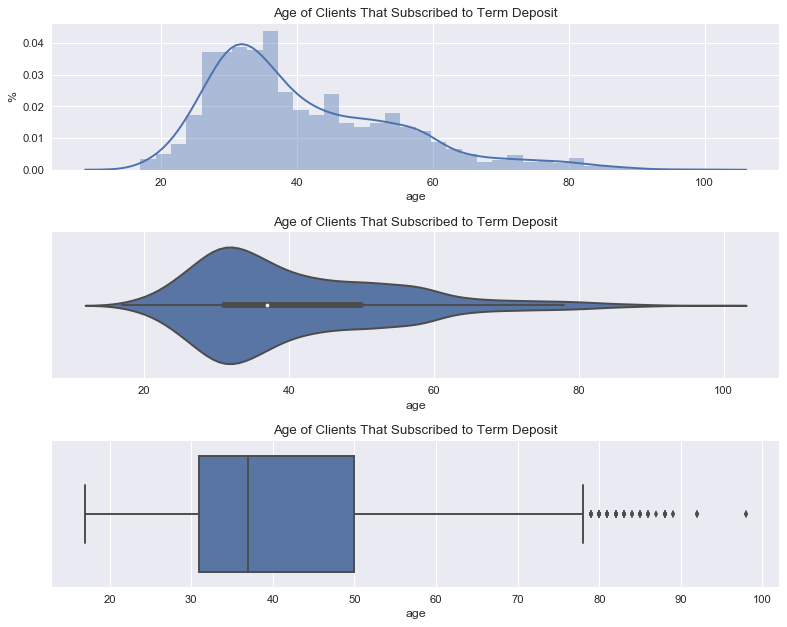

In [11]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes.age)
plt.title('Age of Clients That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes.age)
plt.title('Age of Clients That Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes.age)
plt.title('Age of Clients That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

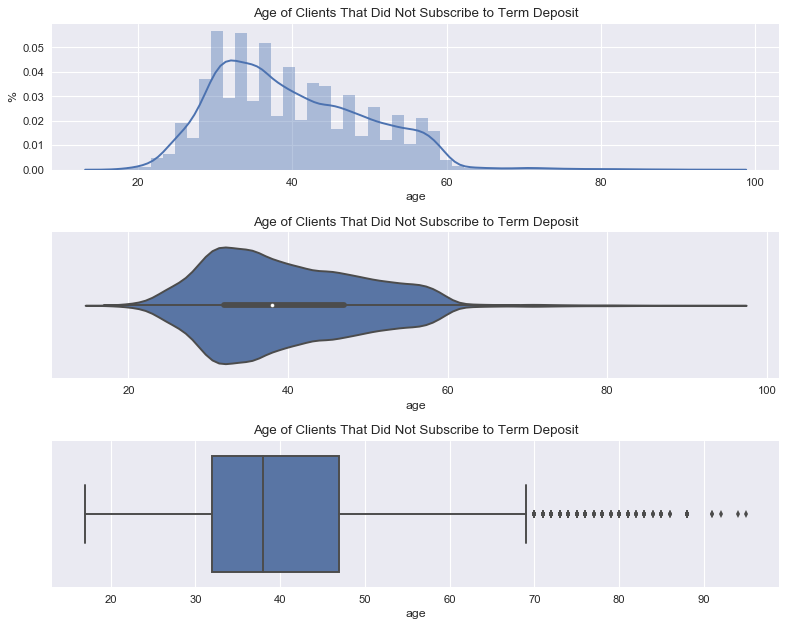

In [12]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no.age)
plt.title('Age of Clients That Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no.age)
plt.title('Age of Clients That Did Not Subscribe to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no.age)
plt.title('Age of Clients That Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

In [13]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [14]:
df[df.y == 'yes'].age.describe()

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [15]:
df[df.y == 'no'].age.describe()

count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64

In [16]:
hold = []

for i in np.arange(13): 
    age = pd.crosstab(df2.age, df.y, normalize='index').sort_values('no').iloc[(i*6):(i+1)*6].index.values
    hold.append(age)

In [17]:
pd.crosstab(df2.age, df.y, normalize='index').sort_values('no')

y,no,yes
age,,
98,0.000000,1.000000
89,0.000000,1.000000
87,0.000000,1.000000
92,0.250000,0.750000
77,0.350000,0.650000
82,0.352941,0.647059
86,0.375000,0.625000
80,0.419355,0.580645
76,0.470588,0.529412


In [18]:
def f(x, i):
    if x in hold[i]:
        return 1
    else: 
        return 0 

df2['age_1'] = df2['age'].apply(lambda x: f(x, 0))
df2['age_2'] = df2['age'].apply(lambda x: f(x, 1))
df2['age_3'] = df2['age'].apply(lambda x: f(x, 2))
df2['age_4'] = df2['age'].apply(lambda x: f(x, 3))
df2['age_5'] = df2['age'].apply(lambda x: f(x, 4))
df2['age_6'] = df2['age'].apply(lambda x: f(x, 5))
df2['age_7'] = df2['age'].apply(lambda x: f(x, 6))
df2['age_8'] = df2['age'].apply(lambda x: f(x, 7))
df2['age_9'] = df2['age'].apply(lambda x: f(x, 8))
df2['age_10'] = df2['age'].apply(lambda x: f(x, 9))
df2['age_11'] = df2['age'].apply(lambda x: f(x, 10))
df2['age_12'] = df2['age'].apply(lambda x: f(x, 11))
df2['age_13'] = df2['age'].apply(lambda x: f(x, 12))

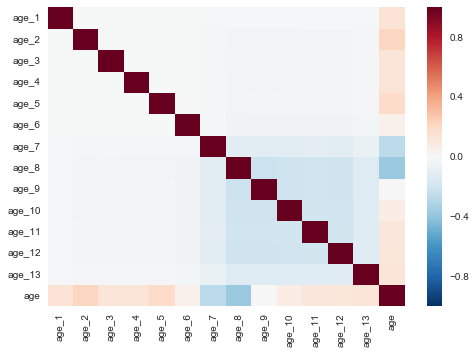

In [19]:
cols = df2.iloc[:,74:].columns
cols = list(cols)
cols.append('age')
plt.gcf().clear()
corr = df2[cols].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
job = df.groupby(['y','job'])['y'].count()
job
job.to_frame()
job = job.rename(columns={'y':'count'})
job = job.reset_index().rename(columns={0:'count'})

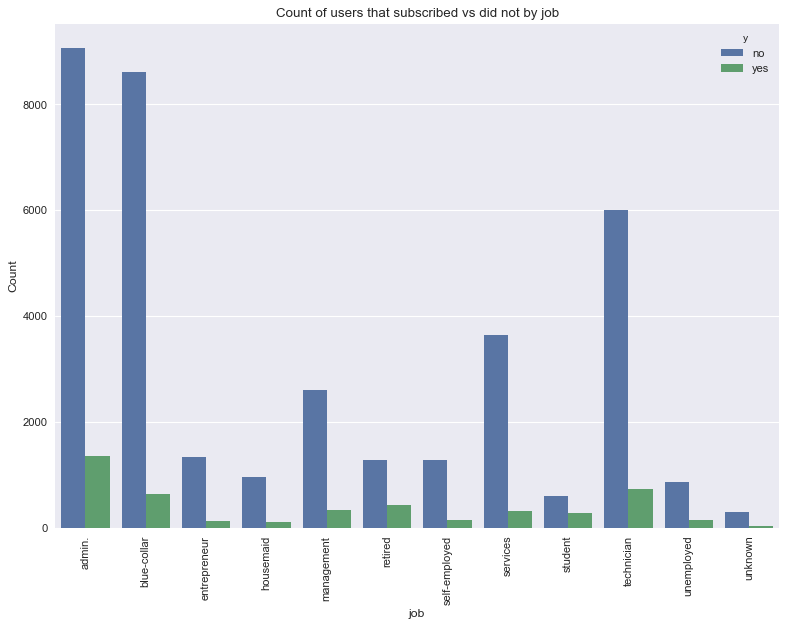

In [21]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='job', y='count', hue='y', data=job)

plt.title('Count of users that subscribed vs did not by job')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [4]:
var = 'job'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index').sort_values('no'))

Variable summary statistics
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object 

Yes varaible summary statistics
count       4640
unique        12
top       admin.
freq        1352
Name: job, dtype: object 

No variable summary statistics
count      36548
unique        12
top       admin.
freq        9070
Name: job, dtype: object 

Yes vs no break down by variable
y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943


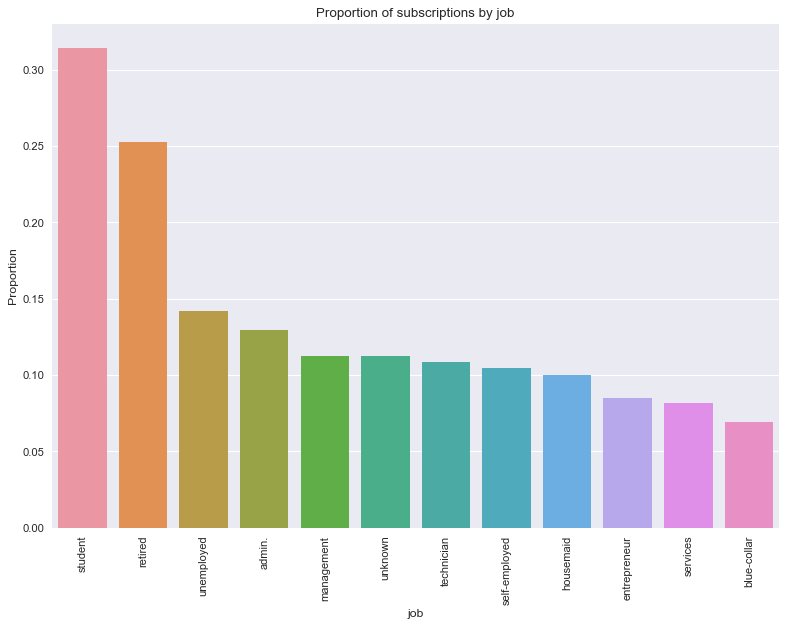

In [5]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='job', y='yes', data=a)

plt.title('Proportion of subscriptions by job')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [24]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no')
df2['jobs_1'] = df2['student'] + df2['retired']
df2['jobs_2'] = df2['admin.'] + df2['unemployed']
df2['jobs_3'] = df2['management'] + df2['unknown_profession'] + df2['technician']
df2['jobs_4'] = df2['technician'] + df2['unemployed'] + df2['unknown_profession']

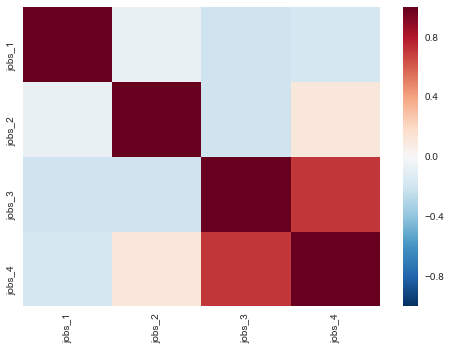

In [25]:
plt.gcf().clear()
corr = cols = df2.iloc[:,87:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
marital = df.groupby(['y','marital'])['y'].count()
marital
marital.to_frame()
marital = marital.rename(columns={'y':'count'})
marital = marital.reset_index().rename(columns={0:'count'})

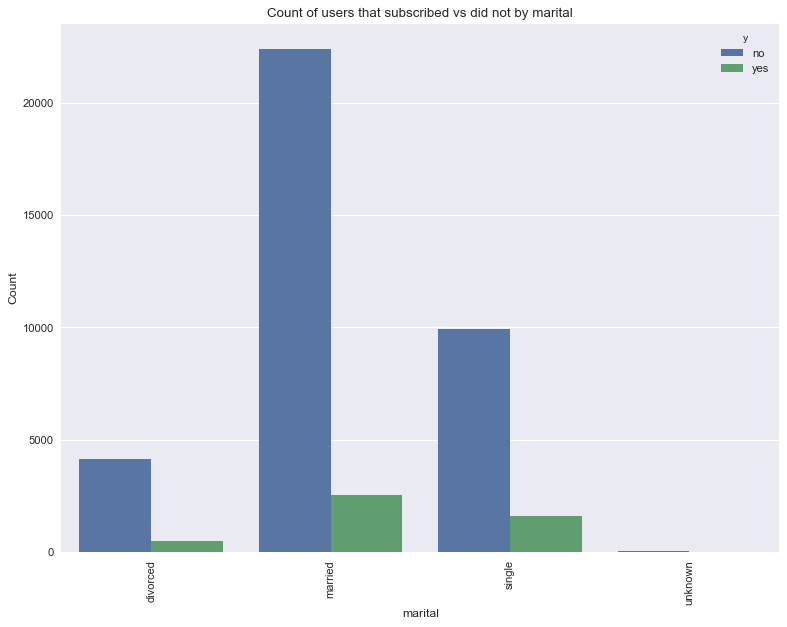

In [45]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='marital', y='count', hue='y', data=marital)

plt.title('Count of users that subscribed vs did not by marital')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [46]:
var = 'marital'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index'))

Variable summary statistics
count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object 

Yes varaible summary statistics
count        4640
unique          4
top       married
freq         2532
Name: marital, dtype: object 

No variable summary statistics
count       36548
unique          4
top       married
freq        22396
Name: marital, dtype: object 

Yes vs no break down by variable
y               no       yes
marital                     
divorced  0.896791  0.103209
married   0.898427  0.101573
single    0.859959  0.140041
unknown   0.850000  0.150000


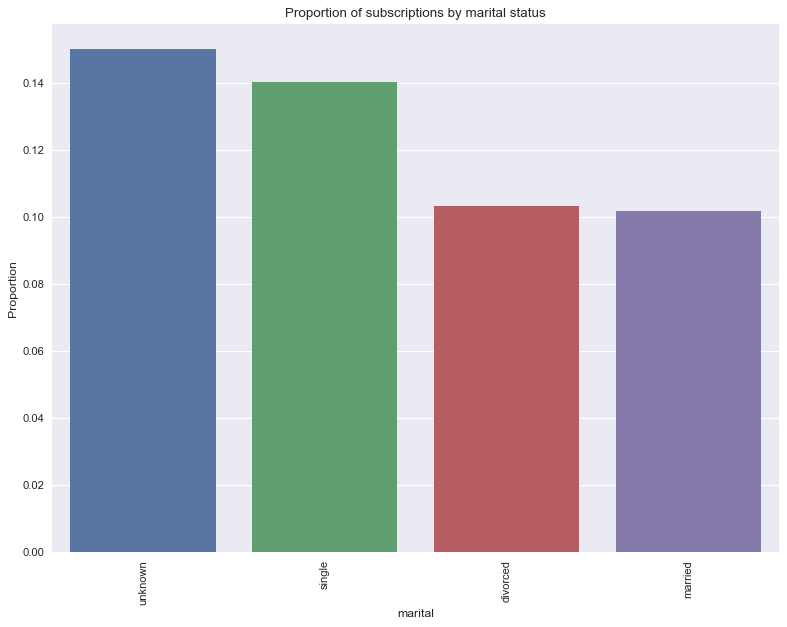

In [47]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='marital', y='yes', data=a)

plt.title('Proportion of subscriptions by marital status')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [29]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no')
df2['married_1'] = df2['divorced'] + df2['married'] 
df2['married_2'] = df2['single'] + df2['unknown_marital_status']

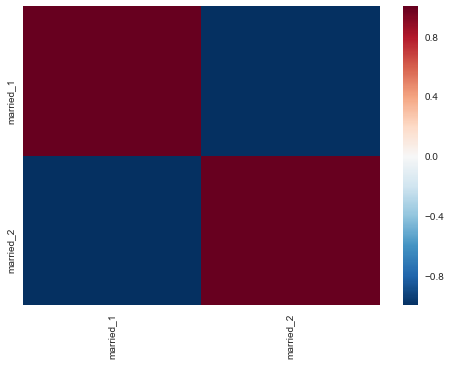

,married_1,married_2
married_1,1.0,-1.0
married_2,-1.0,1.0


In [30]:
corr = df2.iloc[:,91:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

In [1]:
education = df.groupby(['y','education'])['y'].count()
education
education.to_frame()
education = education.rename(columns={'y':'count'})
education = education.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='education', y='count', hue='y', data=education)

plt.title('Count of users that subscribed vs did not by education')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [6]:
var = 'education'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index').sort_values('no'))

Variable summary statistics
count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object 

Yes varaible summary statistics
count                  4640
unique                    8
top       university.degree
freq                   1670
Name: education, dtype: object 

No variable summary statistics
count                 36548
unique                    8
top       university.degree
freq                  10498
Name: education, dtype: object 

Yes vs no break down by variable
y                          no       yes
education                              
illiterate           0.777778  0.222222
unknown              0.854997  0.145003
university.degree    0.862755  0.137245
professional.course  0.886515  0.113485
high.school          0.891645  0.108355
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246


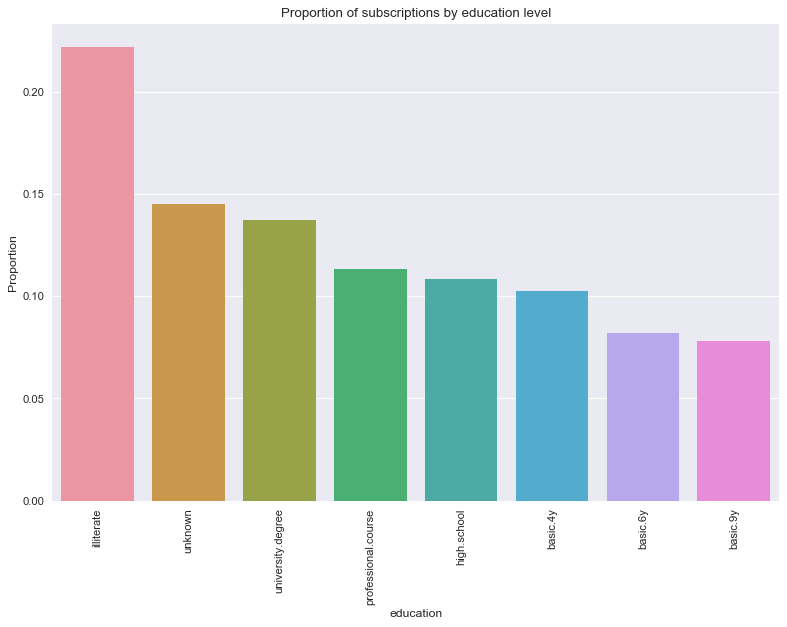

In [7]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='education', y='yes', data=a)

plt.title('Proportion of subscriptions by education level')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [33]:
df2['education_1'] = df2['illiterate']
df2['education_2'] = df2['unknown_education'] + df2['university.degree'] + df2['professional.course']
df2['education_3'] = df2['high.school'] + df2['basic.4y'] 
df2['education_4'] = df2['basic.6y'] + df2['basic.9y'] 

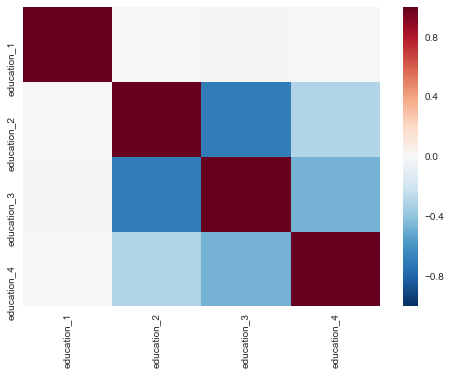

,education_1,education_2,education_3,education_4
education_1,1.000000,-0.013813,-0.022046,-0.009440
education_2,-0.013813,1.000000,-0.696491,-0.298241
education_3,-0.022046,-0.696491,1.000000,-0.476021
education_4,-0.009440,-0.298241,-0.476021,1.000000


In [34]:
corr = df2.iloc[:,93:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

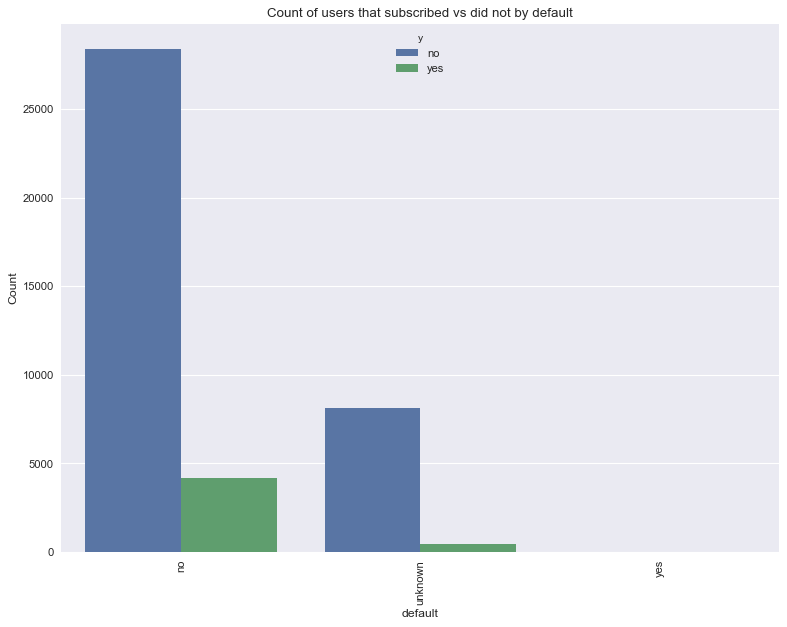

In [48]:
default = df.groupby(['y','default'])['y'].count()
default
default.to_frame()
default = default.rename(columns={'y':'count'})
default = default.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='default', y='count', hue='y', data=default)

plt.title('Count of users that subscribed vs did not by default')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [49]:
var = 'default'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index'))

Variable summary statistics
count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object 

Yes varaible summary statistics
count     4640
unique       2
top         no
freq      4197
Name: default, dtype: object 

No variable summary statistics
count     36548
unique        3
top          no
freq      28391
Name: default, dtype: object 

Yes vs no break down by variable
y             no      yes
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000


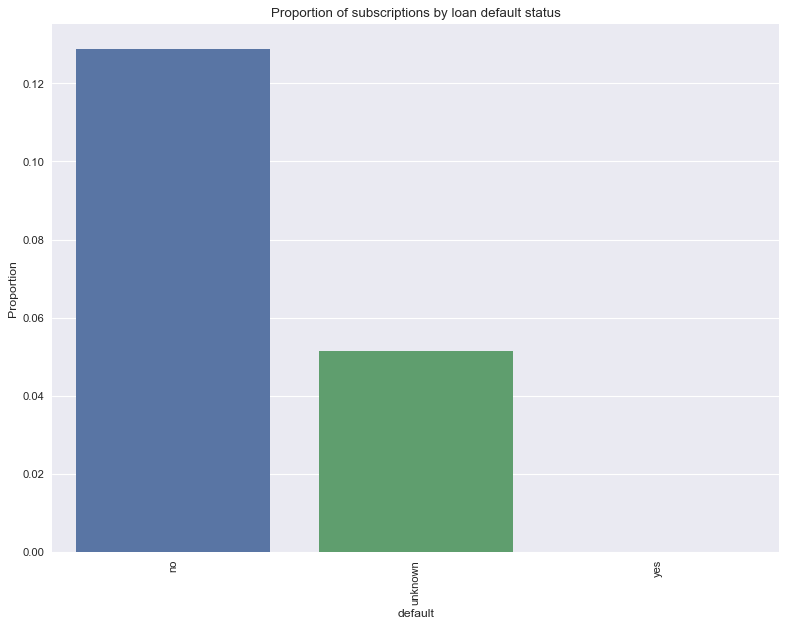

In [51]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='default', y='yes', data=a)

plt.title('Proportion of subscriptions by loan default status')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

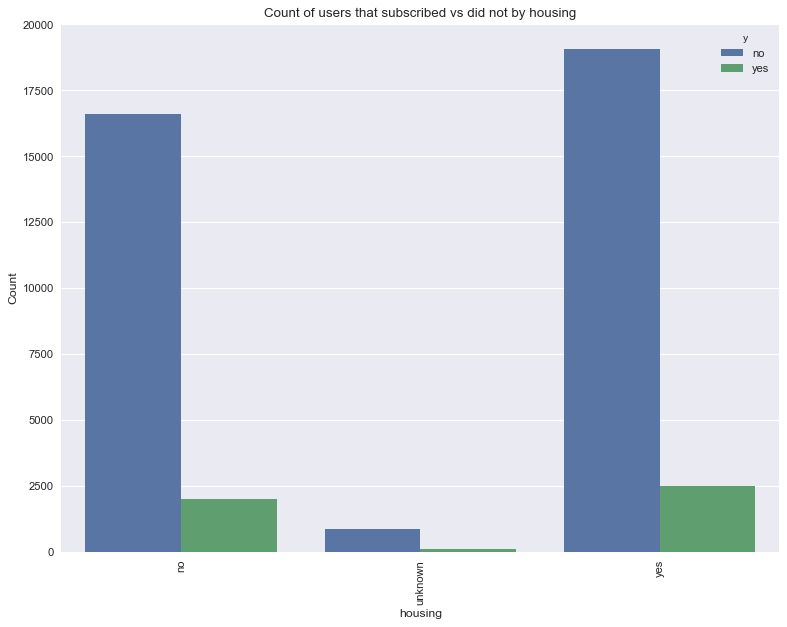

In [52]:
housing = df.groupby(['y','housing'])['y'].count()
housing
housing.to_frame()
housing = housing.rename(columns={'y':'count'})
housing = housing.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='housing', y='count', hue='y', data=housing)

plt.title('Count of users that subscribed vs did not by housing')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [53]:
var = 'housing'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index'))

Variable summary statistics
count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object 

Yes varaible summary statistics
count     4640
unique       3
top        yes
freq      2507
Name: housing, dtype: object 

No variable summary statistics
count     36548
unique        3
top         yes
freq      19069
Name: housing, dtype: object 

Yes vs no break down by variable
y              no       yes
housing                    
no       0.891204  0.108796
unknown  0.891919  0.108081
yes      0.883806  0.116194


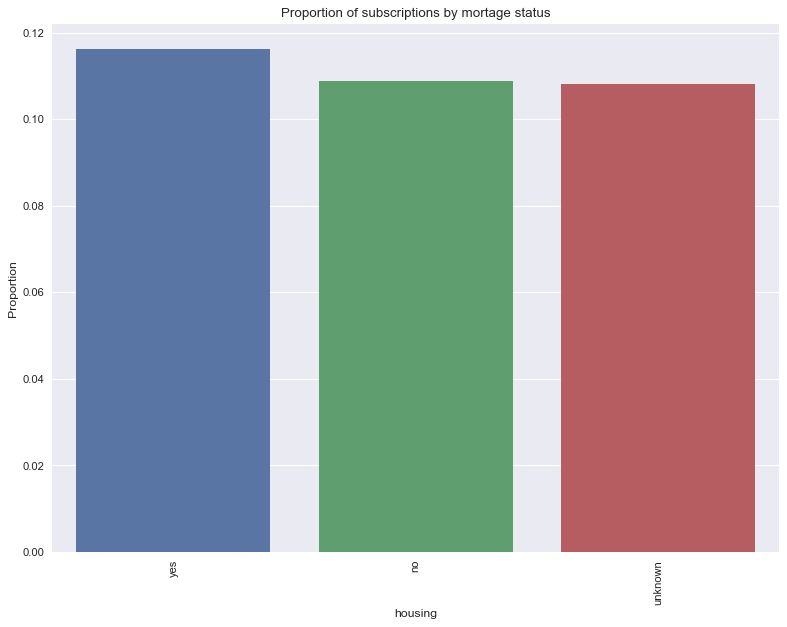

In [54]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='housing', y='yes', data=a)

plt.title('Proportion of subscriptions by mortage status')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

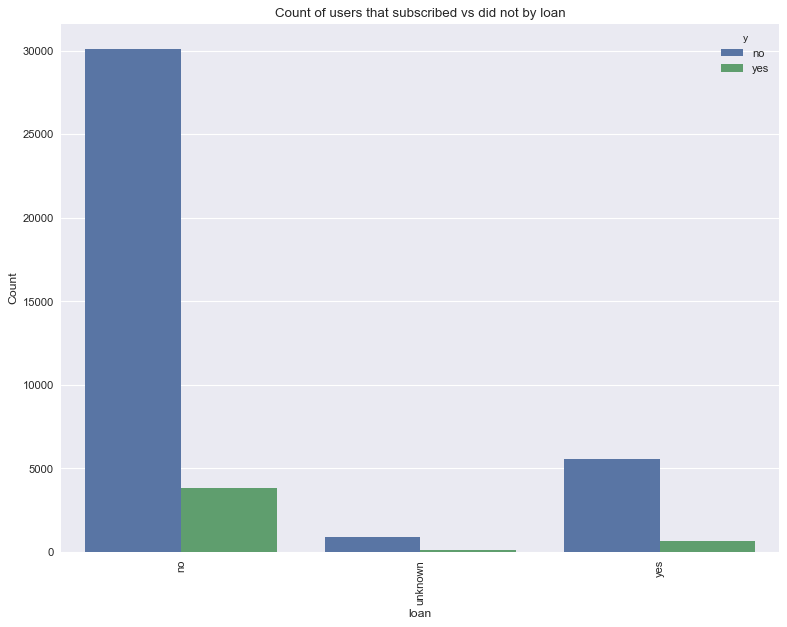

In [55]:
loan = df.groupby(['y','loan'])['y'].count()
loan
loan.to_frame()
loan = loan.rename(columns={'y':'count'})
loan = loan.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='loan', y='count', hue='y', data=loan)

plt.title('Count of users that subscribed vs did not by loan')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [56]:
var = 'loan'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index'))

Variable summary statistics
count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object 

Yes varaible summary statistics
count     4640
unique       3
top         no
freq      3850
Name: loan, dtype: object 

No variable summary statistics
count     36548
unique        3
top          no
freq      30100
Name: loan, dtype: object 

Yes vs no break down by variable
y              no       yes
loan                       
no       0.886598  0.113402
unknown  0.891919  0.108081
yes      0.890685  0.109315


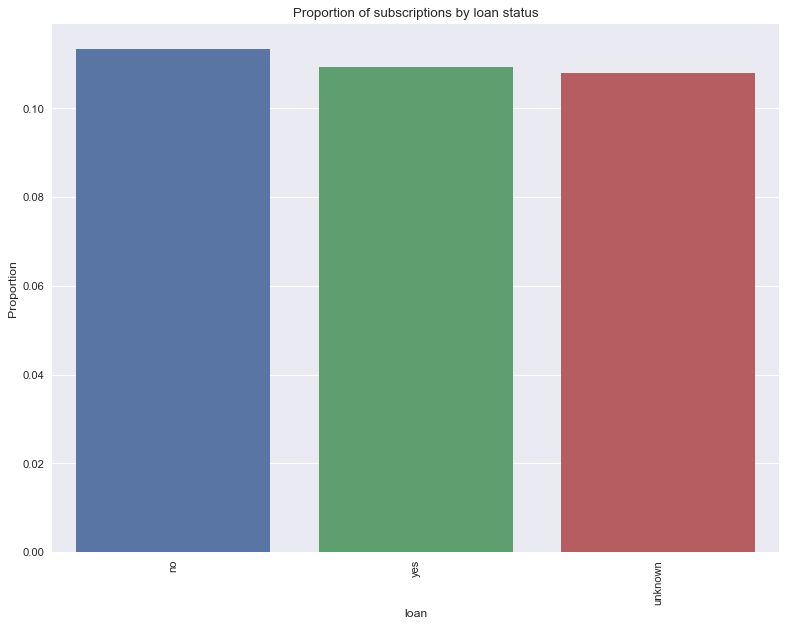

In [57]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='loan', y='yes', data=a)

plt.title('Proportion of subscriptions by loan status')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

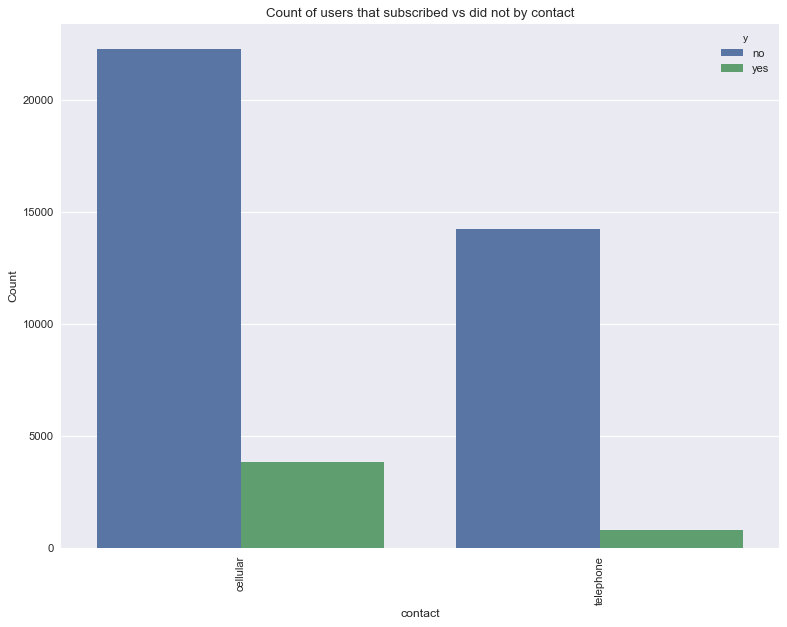

In [58]:
contact = df.groupby(['y','contact'])['y'].count()
contact
contact.to_frame()
contact = contact.rename(columns={'y':'count'})
contact = contact.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='contact', y='count', hue='y', data=contact)

plt.title('Count of users that subscribed vs did not by contact')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [59]:
var = 'contact'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index'))

Variable summary statistics
count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object 

Yes varaible summary statistics
count         4640
unique           2
top       cellular
freq          3853
Name: contact, dtype: object 

No variable summary statistics
count        36548
unique           2
top       cellular
freq         22291
Name: contact, dtype: object 

Yes vs no break down by variable
y                no       yes
contact                      
cellular   0.852624  0.147376
telephone  0.947687  0.052313


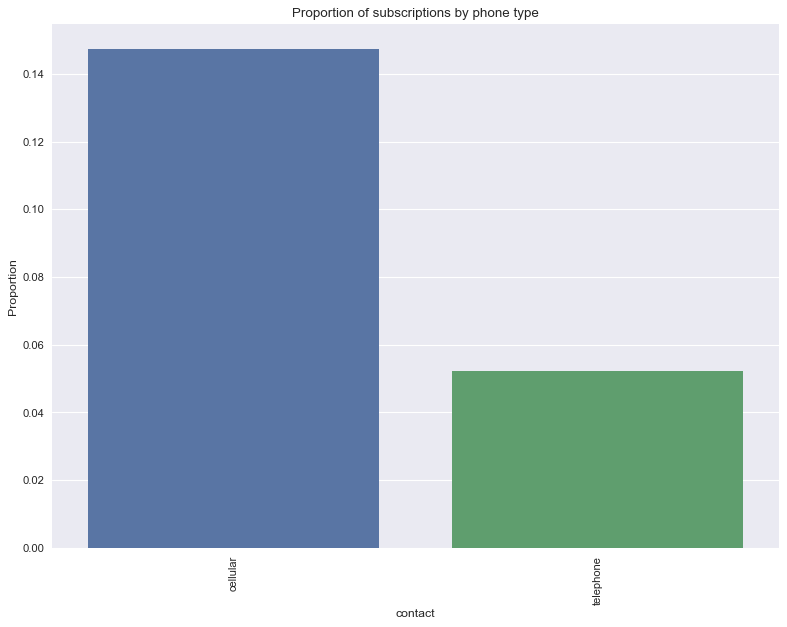

In [61]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='contact', y='yes', data=a)

plt.title('Proportion of subscriptions by phone type')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [43]:
26144/41188


0.6347479848499563

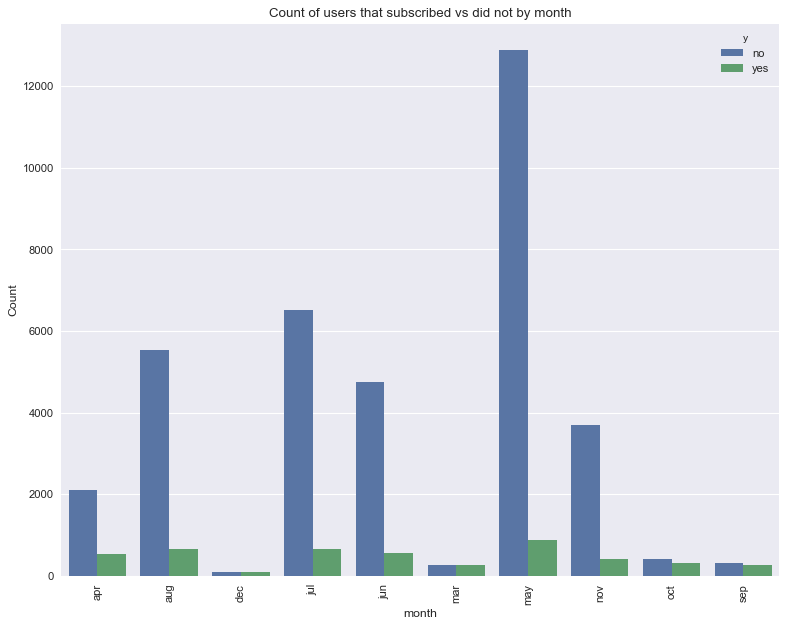

In [62]:
month = df.groupby(['y','month'])['y'].count()
month
month.to_frame()
month = month.rename(columns={'y':'count'})
month = month.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='month', y='count', hue='y', data=month)

plt.title('Count of users that subscribed vs did not by month')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [63]:
var = 'month'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index').sort_values('no'))

Variable summary statistics
count     41188
unique       10
top         may
freq      13769
Name: month, dtype: object 

Yes varaible summary statistics
count     4640
unique      10
top        may
freq       886
Name: month, dtype: object 

No variable summary statistics
count     36548
unique       10
top         may
freq      12883
Name: month, dtype: object 

Yes vs no break down by variable
y            no       yes
month                    
mar    0.494505  0.505495
dec    0.510989  0.489011
sep    0.550877  0.449123
oct    0.561281  0.438719
apr    0.795213  0.204787
aug    0.893979  0.106021
jun    0.894885  0.105115
nov    0.898561  0.101439
jul    0.909534  0.090466
may    0.935653  0.064347


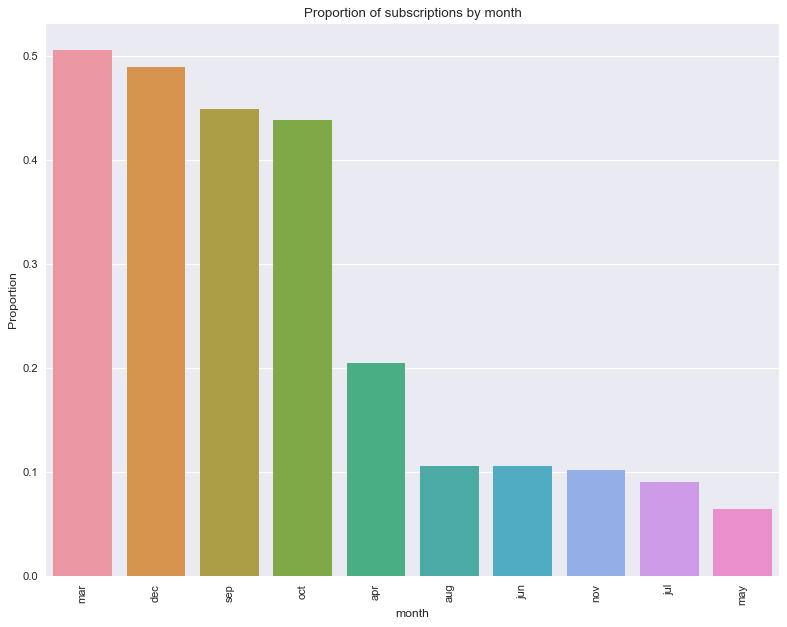

In [64]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='month', y='yes', data=a)

plt.title('Proportion of subscriptions by month')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [46]:
df2['month_1'] = df2['mar'] + df2['dec']
df2['month_2'] = df2['sep'] + df2['oct']
df2['month_3'] = df2['apr']
df2['month_4'] = df2['aug'] + df2['jun'] + df2['nov']
df2['month_5'] = df2['jul'] + df2['may']

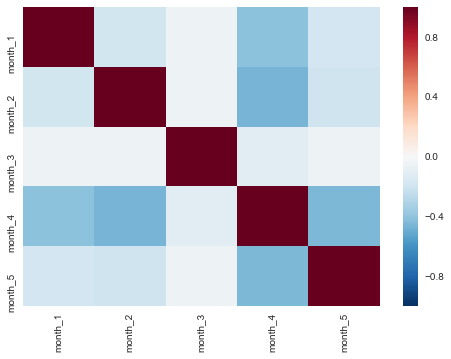

,month_1,month_2,month_3,month_4,month_5
month_1,1.000000,-0.190438,-0.047338,-0.406590,-0.183147
month_2,-0.190438,1.000000,-0.054046,-0.464213,-0.209103
month_3,-0.047338,-0.054046,1.000000,-0.115390,-0.051977
month_4,-0.406590,-0.464213,-0.115390,1.000000,-0.446439
month_5,-0.183147,-0.209103,-0.051977,-0.446439,1.000000


In [47]:
corr = df2.iloc[:,97:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

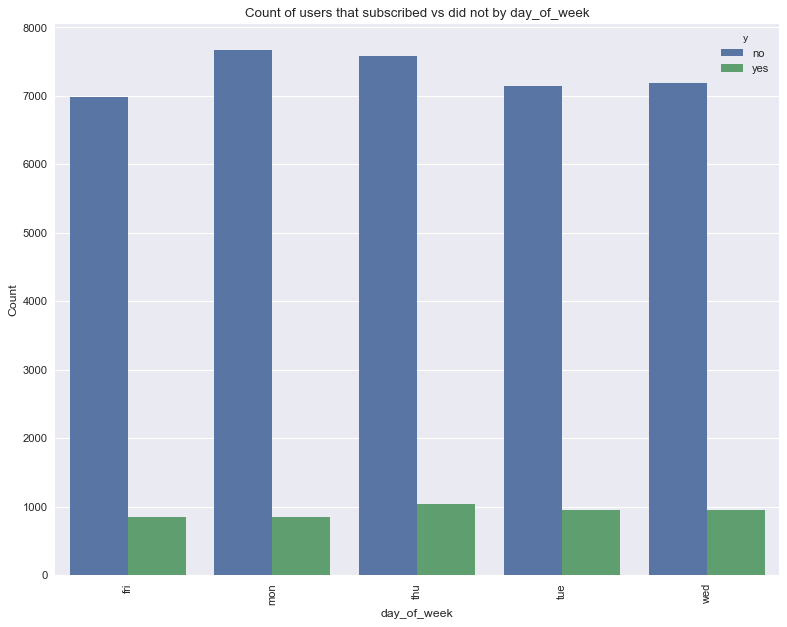

In [65]:
day_of_week = df.groupby(['y','day_of_week'])['y'].count()
day_of_week
day_of_week.to_frame()
day_of_week = day_of_week.rename(columns={'y':'count'})
day_of_week = day_of_week.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='day_of_week', y='count', hue='y', data=day_of_week)

plt.title('Count of users that subscribed vs did not by day_of_week')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [8]:
var = 'day_of_week'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index').sort_values('no'))

Variable summary statistics
count     41188
unique        5
top         thu
freq       8623
Name: day_of_week, dtype: object 

Yes varaible summary statistics
count     4640
unique       5
top        thu
freq      1045
Name: day_of_week, dtype: object 

No variable summary statistics
count     36548
unique        5
top         mon
freq       7667
Name: day_of_week, dtype: object 

Yes vs no break down by variable
y                  no       yes
day_of_week                    
thu          0.878812  0.121188
tue          0.882200  0.117800
wed          0.883329  0.116671
fri          0.891913  0.108087
mon          0.900517  0.099483


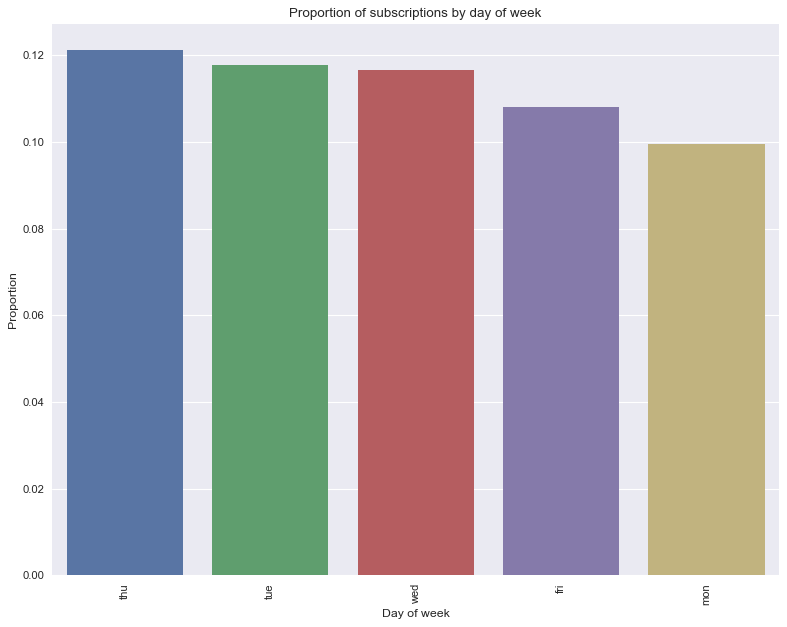

In [9]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='day_of_week', y='yes', data=a)

plt.title('Proportion of subscriptions by day of week')
plt.ylabel('Proportion')
plt.xlabel('Day of week')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

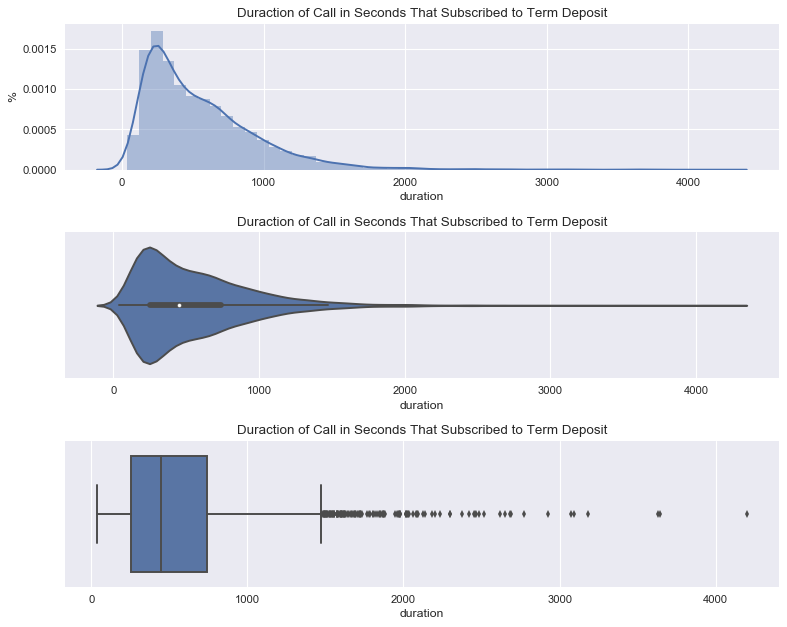

In [50]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes.duration)
plt.title('Duraction of Call in Seconds That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes.duration)
plt.title('Duraction of Call in Seconds That Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes.duration)
plt.title('Duraction of Call in Seconds That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

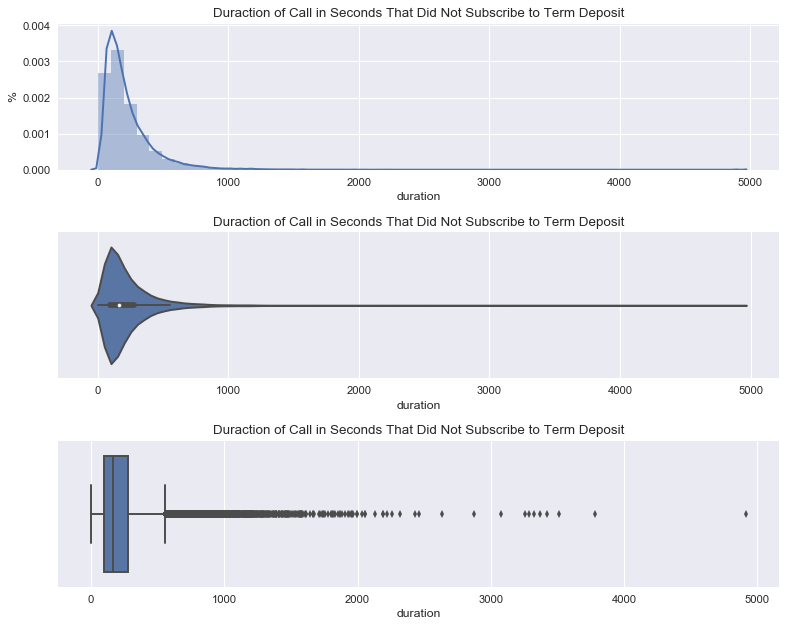

In [51]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no.duration)
plt.title('Duraction of Call in Seconds That Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no.duration)
plt.title('Duraction of Call in Seconds That Did Not Subscribe to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no.duration)
plt.title('Duraction of Call in Seconds That Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

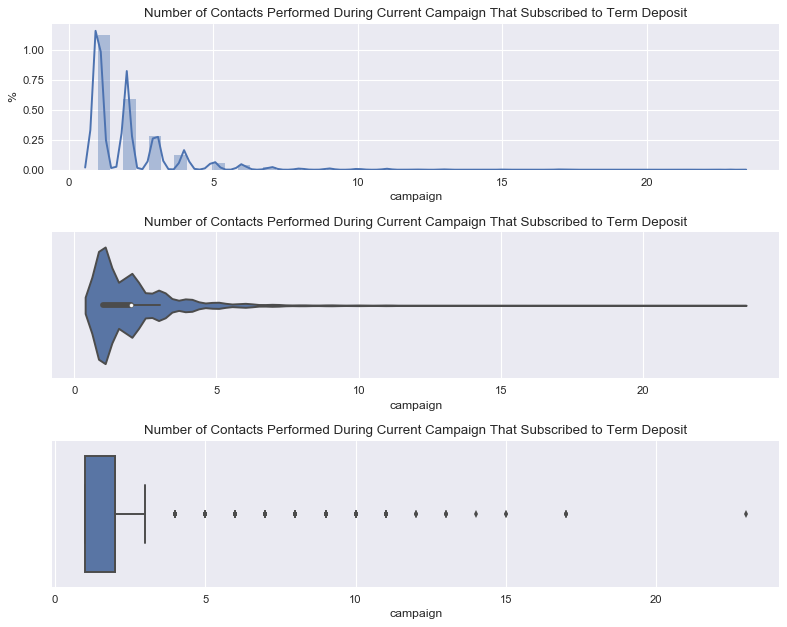

In [52]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

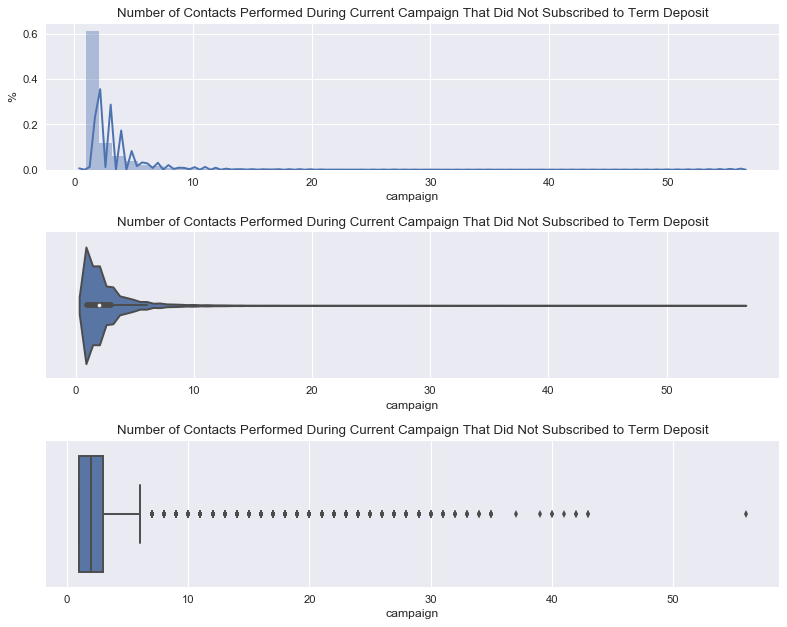

In [53]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Did Not Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Did Not Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no.campaign)
plt.title('Number of Contacts Performed During Current Campaign That Did Not Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

In [54]:
len(pd.crosstab(df.campaign, df.y, normalize='index').sort_values('no'))

42

In [55]:
def f(x, i):
    if x in hold[i]:
        return 1
    else: 
        return 0 

In [56]:
print(len(pd.crosstab(df.campaign, df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df.campaign, df.y, normalize='index').sort_values('no'))

42
y               no       yes
campaign                    
1         0.869629  0.130371
2         0.885430  0.114570
3         0.892529  0.107471
4         0.906073  0.093927
6         0.923391  0.076609
5         0.924953  0.075047
17        0.931034  0.068966
11        0.932203  0.067797
23        0.937500  0.062500
7         0.939587  0.060413
9         0.939929  0.060071
10        0.946667  0.053333
13        0.956522  0.043478
8         0.957500  0.042500
15        0.960784  0.039216
12        0.976000  0.024000
14        0.985507  0.014493
41        1.000000  0.000000
40        1.000000  0.000000
39        1.000000  0.000000
37        1.000000  0.000000
35        1.000000  0.000000
31        1.000000  0.000000
34        1.000000  0.000000
33        1.000000  0.000000
32        1.000000  0.000000
42        1.000000  0.000000
30        1.000000  0.000000
21        1.000000  0.000000
28        1.000000  0.000000
27        1.000000  0.000000
26        1.000000  0.000000
25        1

In [57]:
pd.crosstab?

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: campaign, dtype: int64
41188


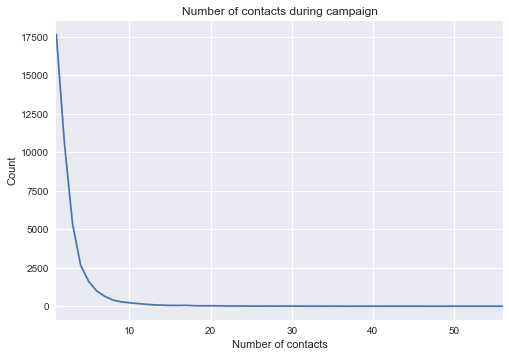

In [58]:
counts = df.groupby('campaign')['campaign'].count()
print(counts)
print(counts.sum())
prop = counts / counts.sum()
counts.plot()
plt.title('Number of contacts during campaign')
plt.ylabel('Count')
plt.xlabel('Number of contacts')
plt.show()

In [59]:
# Percent of clients under five contacts during campaign
42.8 + 25.6 + 12.9 + 6.4 + 3.8

91.50000000000001

In [60]:
prop

campaign
1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
15    0.001238
16    0.001238
17    0.001408
18    0.000801
19    0.000631
20    0.000728
21    0.000583
22    0.000413
23    0.000388
24    0.000364
25    0.000194
26    0.000194
27    0.000267
28    0.000194
29    0.000243
30    0.000170
31    0.000170
32    0.000097
33    0.000097
34    0.000073
35    0.000121
37    0.000024
39    0.000024
40    0.000049
41    0.000024
42    0.000049
43    0.000049
56    0.000024
Name: campaign, dtype: float64

In [61]:
hold = []
campaign = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[:4,:].index.values
hold.append(campaign)

campaign = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[4:11,:].index.values
hold.append(campaign)

campaign = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[11:17,:].index.values
hold.append(campaign)


campaign = pd.crosstab(df.campaign, df.y, normalize='index').sort_values('no').iloc[17:,:].index.values
hold.append(campaign)

hold

[array([26, 25, 21, 27]),
 array([13,  6,  3, 22, 15,  0,  8]),
 array([ 7,  5,  2, 10, 18, 14]),
 array([41, 40, 39, 37, 35, 31, 34, 33, 32, 42, 30, 21, 28, 27, 26, 25, 24,
        22, 43, 20, 19, 18, 16, 29, 56])]

In [62]:
df2['campaign_1'] = df2['campaign'].apply(lambda x: f(x, 0))
df2['campaign_2'] = df2['campaign'].apply(lambda x: f(x, 1))
df2['campaign_3'] = df2['campaign'].apply(lambda x: f(x, 2))
df2['campaign_4'] = df2['campaign'].apply(lambda x: f(x, 3))

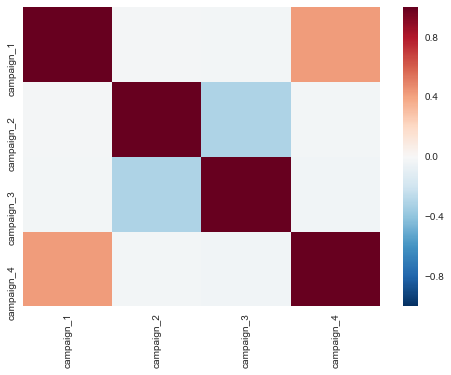

,campaign_1,campaign_2,campaign_3,campaign_4
campaign_1,1.000000,-0.015768,-0.024080,0.424829
campaign_2,-0.015768,1.000000,-0.306252,-0.023673
campaign_3,-0.024080,-0.306252,1.000000,-0.035792
campaign_4,0.424829,-0.023673,-0.035792,1.000000


In [63]:
corr = df2.iloc[:,102:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

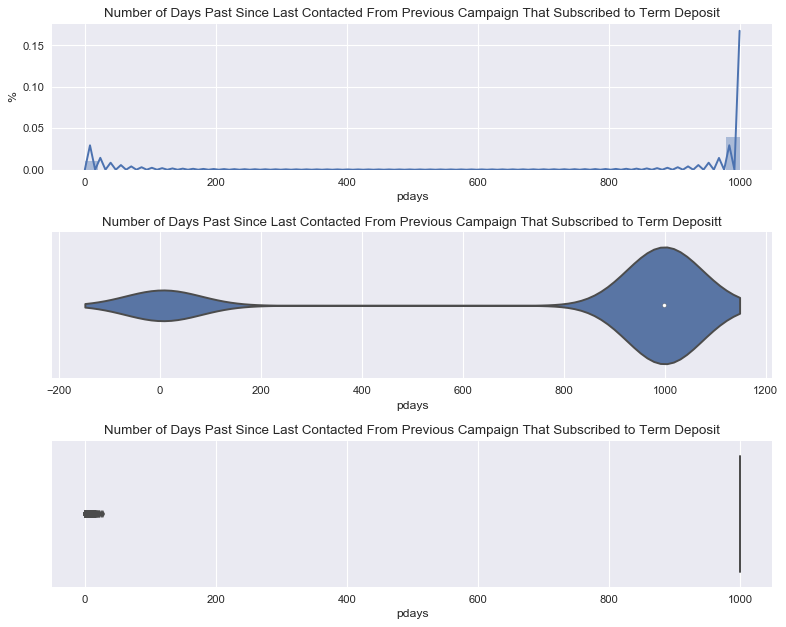

In [64]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Depositt')

plt.subplot(3, 1, 3)
sns.boxplot(yes.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

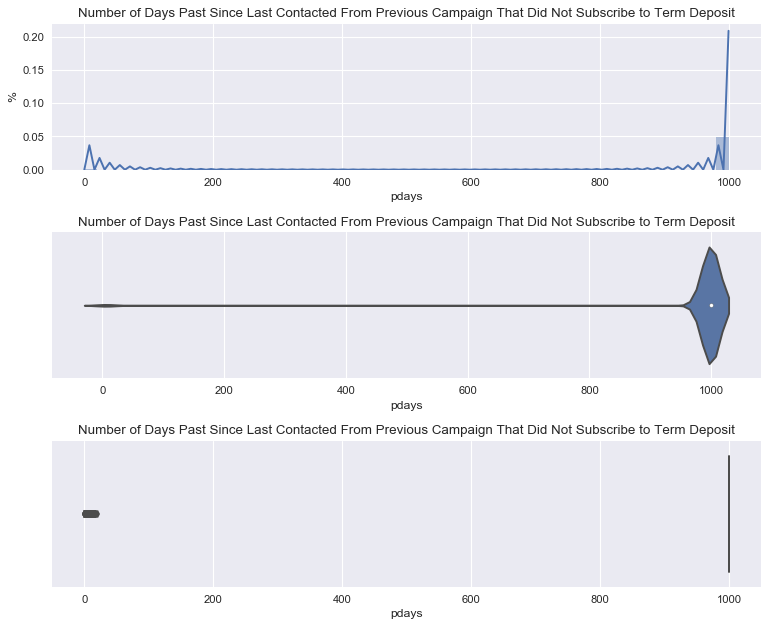

In [65]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

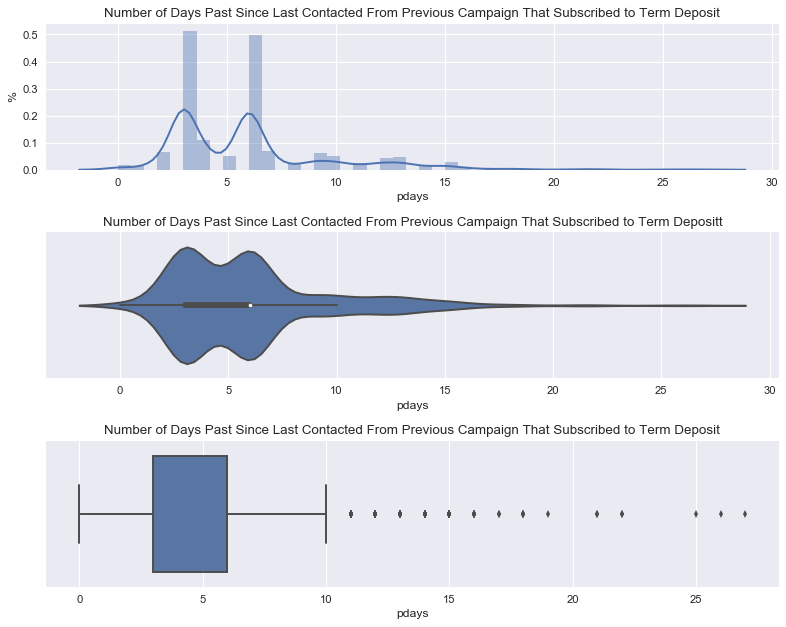

In [66]:
yes = df[df.y == 'yes']
pdays_plot_y = yes[yes.pdays != 999]

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(pdays_plot_y.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(pdays_plot_y.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Depositt')

plt.subplot(3, 1, 3)
sns.boxplot(pdays_plot_y.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

In [67]:
len(df[df.pdays == 999]) / len(df)

0.9632174419733903

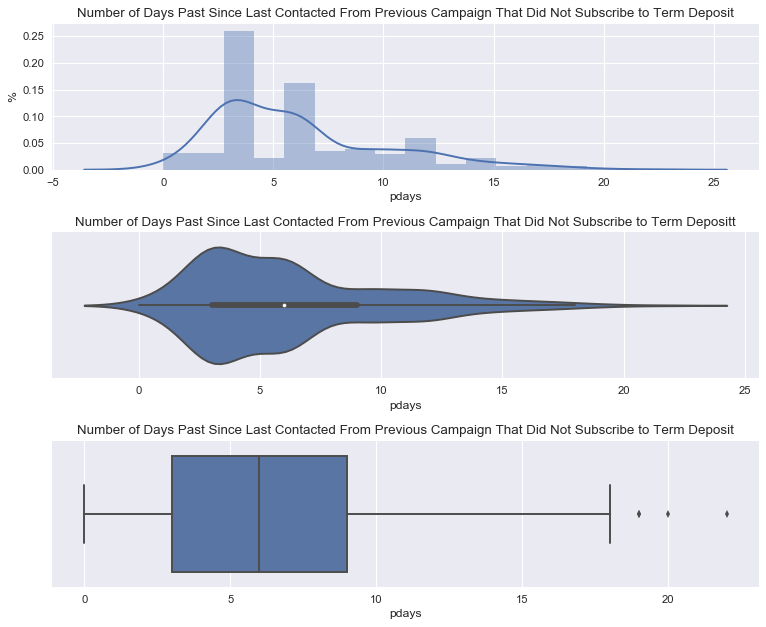

In [68]:
no  = df[df.y == 'no']
pdays_plot_n = no[no.pdays != 999]
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(pdays_plot_n.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(pdays_plot_n.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Depositt')

plt.subplot(3, 1, 3)
sns.boxplot(pdays_plot_n.pdays)
plt.title('Number of Days Past Since Last Contacted From Previous Campaign That Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

In [69]:
print(len(pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no'))

27
y            no       yes
pdays                    
26     0.000000  1.000000
25     0.000000  1.000000
21     0.000000  1.000000
27     0.000000  1.000000
13     0.222222  0.777778
6      0.298544  0.701456
3      0.321185  0.678815
22     0.333333  0.666667
15     0.333333  0.666667
0      0.333333  0.666667
8      0.333333  0.666667
7      0.333333  0.666667
5      0.369565  0.630435
2      0.393443  0.606557
10     0.423077  0.576923
18     0.428571  0.571429
14     0.450000  0.550000
9      0.453125  0.546875
16     0.454545  0.545455
11     0.464286  0.535714
4      0.466102  0.533898
12     0.551724  0.448276
19     0.666667  0.333333
1      0.692308  0.307692
17     0.750000  0.250000
999    0.907418  0.092582
20     1.000000  0.000000


In [70]:
hold = []
pdays = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[:4].index.values
hold.append(pdays)
pdays = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[4:14].index.values
hold.append(pdays)
pdays = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[14:21].index.values
hold.append(pdays)
pdays = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[21:24].index.values
hold.append(pdays)
pdays = pd.crosstab(df.pdays, df.y, normalize='index').sort_values('no').iloc[24:28].index.values
hold.append(pdays)

hold

[array([26, 25, 21, 27]),
 array([13,  6,  3, 22, 15,  0,  8,  7,  5,  2]),
 array([10, 18, 14,  9, 16, 11,  4]),
 array([12, 19,  1]),
 array([ 17, 999,  20])]

In [71]:
df2['pdays_1'] = df2['pdays'].apply(lambda x: f(x, 0))
df2['pdays_2'] = df2['pdays'].apply(lambda x: f(x, 1))
df2['pdays_3'] = df2['pdays'].apply(lambda x: f(x, 2))
df2['pdays_4'] = df2['pdays'].apply(lambda x: f(x, 3))
df2['pdays_5'] = df2['pdays'].apply(lambda x: f(x, 4))

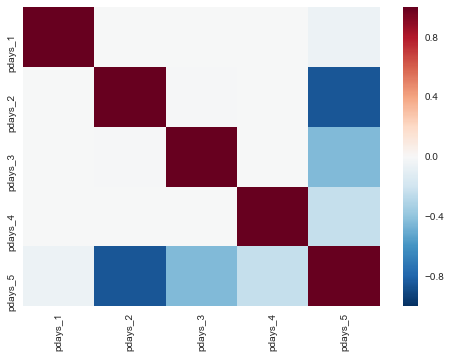

,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5
pdays_1,1.000000,-0.001837,-0.000944,-0.000507,-0.056560
pdays_2,-0.001837,1.000000,-0.014282,-0.007671,-0.855846
pdays_3,-0.000944,-0.014282,1.000000,-0.003941,-0.439690
pdays_4,-0.000507,-0.007671,-0.003941,1.000000,-0.236166
pdays_5,-0.056560,-0.855846,-0.439690,-0.236166,1.000000


In [72]:
corr = df2.iloc[:,106:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

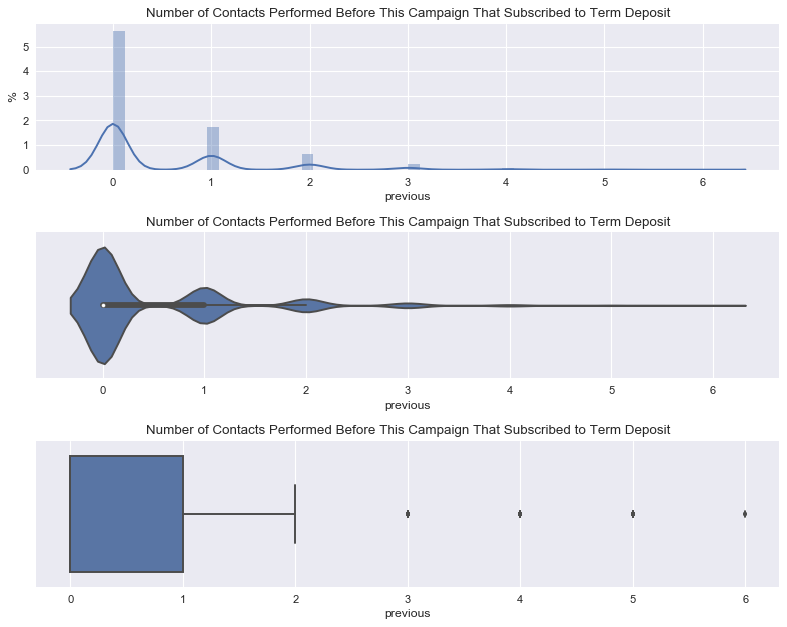

In [73]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes.previous)
plt.title('Number of Contacts Performed Before This Campaign That Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes.previous)
plt.title('Number of Contacts Performed Before This Campaign That Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes.previous)
plt.title('Number of Contacts Performed Before This Campaign That Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

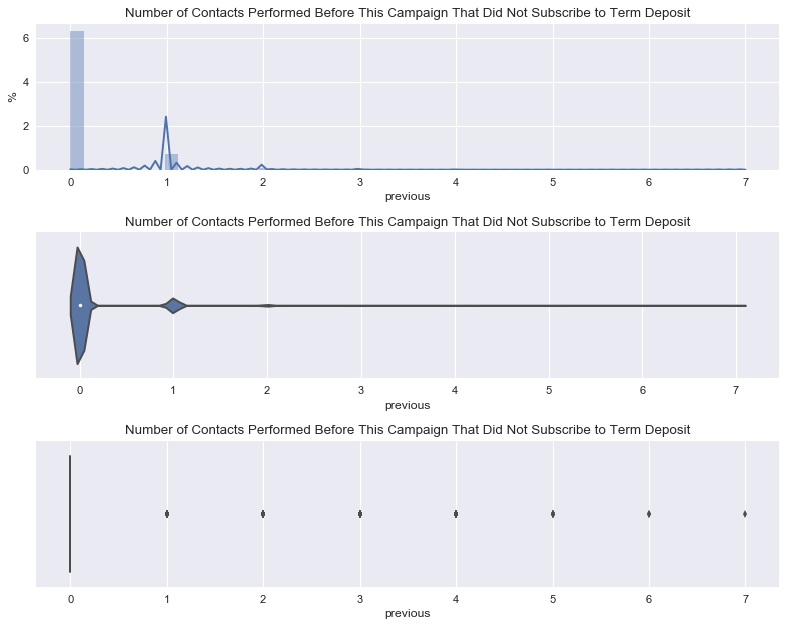

In [74]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no.previous)
plt.title('Number of Contacts Performed Before This Campaign That Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no.previous)
plt.title('Number of Contacts Performed Before This Campaign That Did Not Subscribe to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no.previous)
plt.title('Number of Contacts Performed Before This Campaign That Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

In [75]:
print(len(pd.crosstab(df.previous, df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df.previous, df.y, normalize='index').sort_values('no'))

8
y               no       yes
previous                    
5         0.277778  0.722222
6         0.400000  0.600000
3         0.407407  0.592593
4         0.457143  0.542857
2         0.535809  0.464191
1         0.787985  0.212015
0         0.911678  0.088322
7         1.000000  0.000000


In [76]:
hold = []
previous = pd.crosstab(df.previous, df.y, normalize='index').sort_values('no').iloc[:1].index.values
hold.append(previous)
previous = pd.crosstab(df.previous, df.y, normalize='index').sort_values('no').iloc[1:5].index.values
hold.append(previous)
previous = pd.crosstab(df.previous, df.y, normalize='index').sort_values('no').iloc[5:21].index.values
hold.append(previous)

hold

[array([5]), array([6, 3, 4, 2]), array([1, 0, 7])]

In [77]:
df2['previous_1'] = df2['previous'].apply(lambda x: f(x, 0))
df2['previous_2'] = df2['previous'].apply(lambda x: f(x, 1))
df2['previous_3'] = df2['previous'].apply(lambda x: f(x, 2))

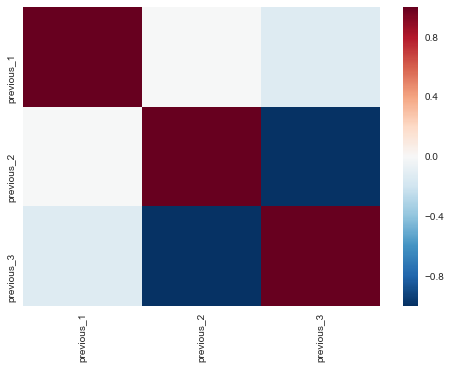

,previous_1,previous_2,previous_3
previous_1,1.000000,-0.003374,-0.128466
previous_2,-0.003374,1.000000,-0.991275
previous_3,-0.128466,-0.991275,1.000000


In [78]:
corr = df2.iloc[:,111:].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

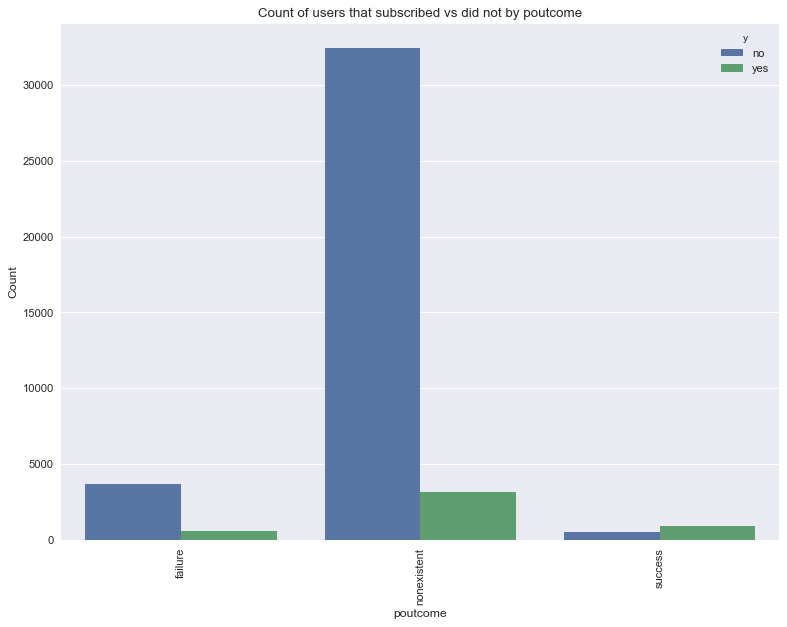

In [68]:
poutcome = df.groupby(['y','poutcome'])['y'].count()
poutcome
poutcome.to_frame()
poutcome = poutcome.rename(columns={'y':'count'})
poutcome = poutcome.reset_index().rename(columns={0:'count'})

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='poutcome', y='count', hue='y', data=poutcome)

plt.title('Count of users that subscribed vs did not by poutcome')
plt.ylabel('Count')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [69]:
var = 'poutcome'
print('Variable summary statistics')
print(df[var].describe(),'\n')

print('Yes varaible summary statistics')
print(df[df.y == 'yes'][var].describe(),'\n')

print('No variable summary statistics')
print(df[df.y == 'no'][var].describe(),'\n')

print('Yes vs no break down by variable')
print(pd.crosstab(df[var], df.y, normalize='index').sort_values('no'))

Variable summary statistics
count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object 

Yes varaible summary statistics
count            4640
unique              3
top       nonexistent
freq             3141
Name: poutcome, dtype: object 

No variable summary statistics
count           36548
unique              3
top       nonexistent
freq            32422
Name: poutcome, dtype: object 

Yes vs no break down by variable
y                  no       yes
poutcome                       
success      0.348871  0.651129
failure      0.857714  0.142286
nonexistent  0.911678  0.088322


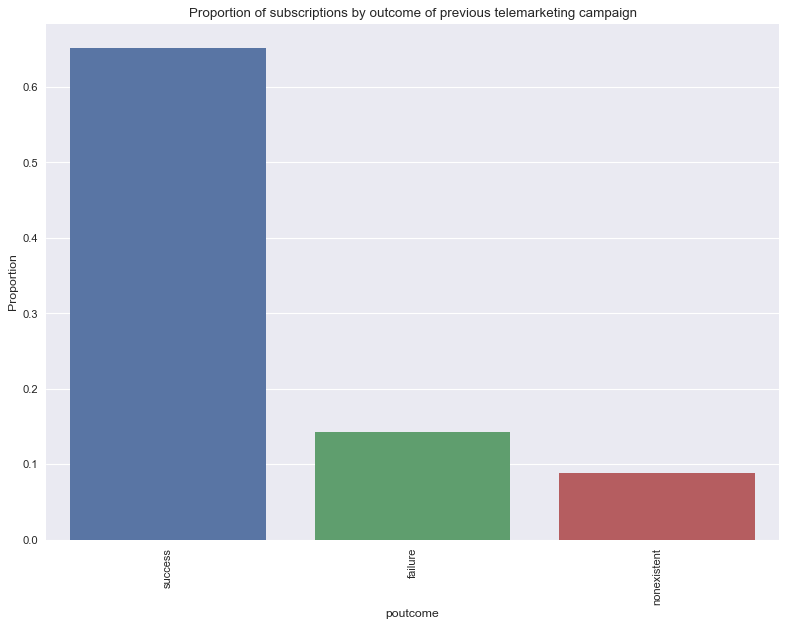

In [70]:
a = pd.crosstab(df[var], df.y, normalize='index').sort_values('no').reset_index()

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='poutcome', y='yes', data=a)

plt.title('Proportion of subscriptions by outcome of previous telemarketing campaign')
plt.ylabel('Proportion')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [81]:
set(df['emp.var.rate'])

{-3.3999999999999999,
 -3.0,
 -2.8999999999999999,
 -1.8,
 -1.7,
 -1.1000000000000001,
 -0.20000000000000001,
 -0.10000000000000001,
 1.1000000000000001,
 1.3999999999999999}

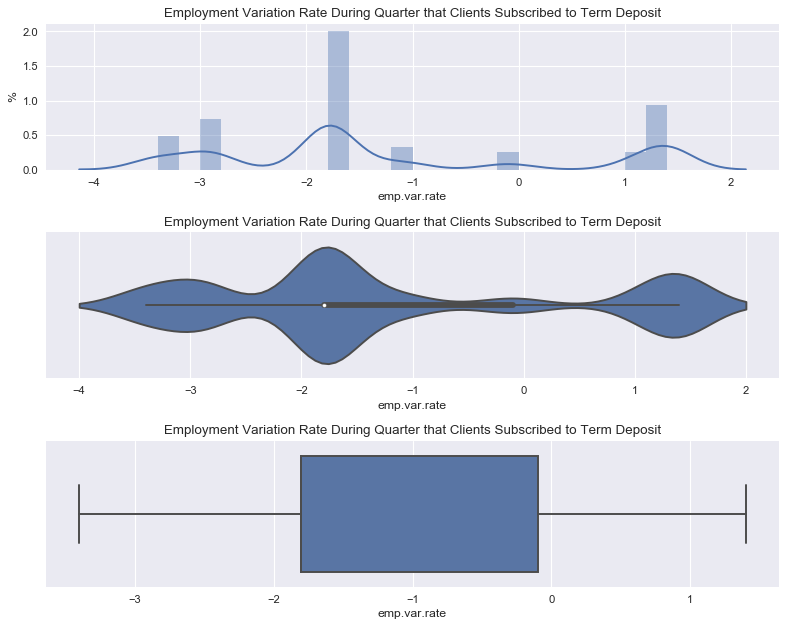

In [82]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

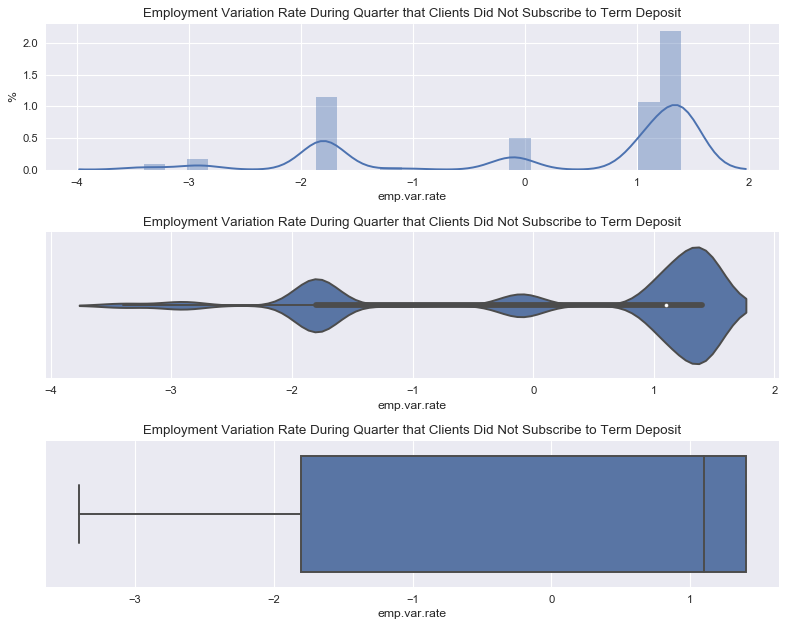

In [83]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Did Not Subscribe to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Did Not Subscribe to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no['emp.var.rate'])
plt.title('Employment Variation Rate During Quarter that Clients Did Not Subscribe to Term Deposit')

plt.tight_layout()
plt.show()

In [84]:
print(len(pd.crosstab(df["emp.var.rate"], df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df["emp.var.rate"], df.y, normalize='index').sort_values('no'))

10
y                   no       yes
emp.var.rate                    
-1.7          0.478655  0.521345
-3.0          0.488372  0.511628
-1.1          0.525984  0.474016
-3.4          0.576097  0.423903
-2.9          0.642814  0.357186
-1.8          0.840919  0.159081
-0.2          0.900000  0.100000
-0.1          0.937008  0.062992
 1.4          0.946655  0.053345
 1.1          0.969084  0.030916


In [85]:
set(df['cons.price.idx'])

{92.201000000000008,
 92.378999999999991,
 92.430999999999997,
 92.468999999999994,
 92.649000000000001,
 92.712999999999994,
 92.756,
 92.842999999999989,
 92.892999999999986,
 92.962999999999994,
 93.075000000000003,
 93.200000000000003,
 93.369,
 93.444000000000003,
 93.748999999999995,
 93.797999999999988,
 93.876000000000005,
 93.917999999999992,
 93.994,
 94.027000000000001,
 94.055000000000007,
 94.198999999999998,
 94.215000000000003,
 94.465000000000003,
 94.600999999999999,
 94.76700000000001}

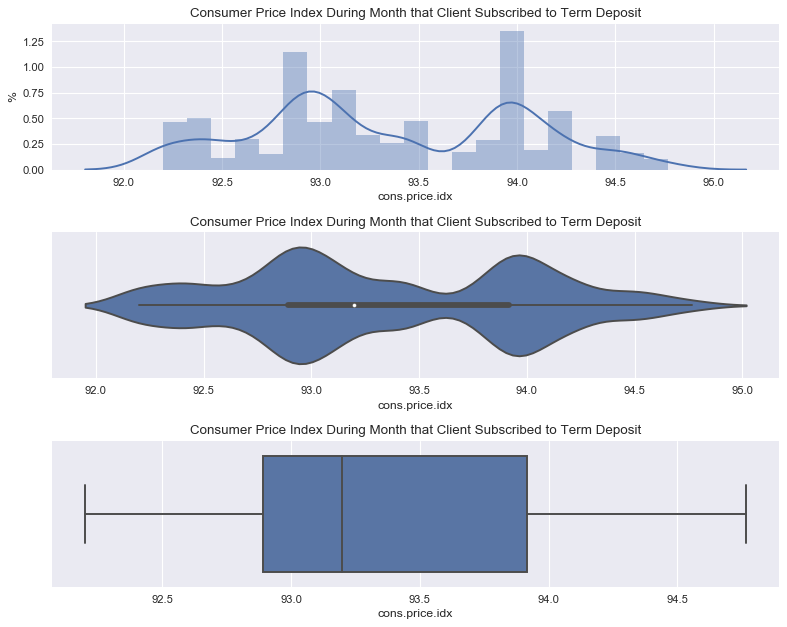

In [86]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

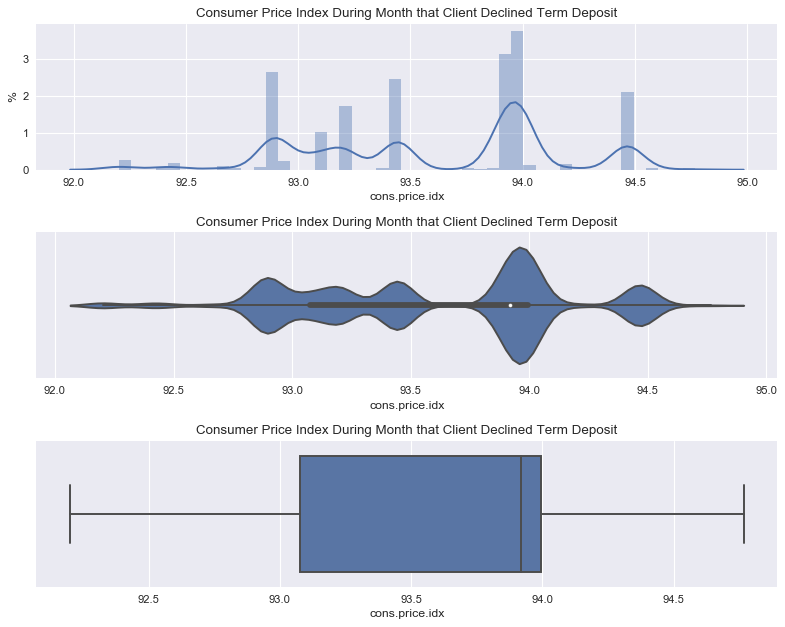

In [87]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Declined Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Declined Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no['cons.price.idx'])
plt.title('Consumer Price Index During Month that Client Declined Term Deposit')

plt.tight_layout()
plt.show()

In [88]:
print(len(pd.crosstab(df["cons.price.idx"], df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df["cons.price.idx"], df.y, normalize='index').sort_values('no'))

26
y                     no       yes
cons.price.idx                    
93.798          0.373134  0.626866
93.876          0.424528  0.575472
93.369          0.431818  0.568182
94.215          0.434084  0.565916
93.749          0.442529  0.557471
94.027          0.484979  0.515021
92.713          0.488372  0.511628
94.199          0.504950  0.495050
92.649          0.529412  0.470588
94.055          0.532751  0.467249
94.601          0.544118  0.455882
94.767          0.546875  0.453125
92.843          0.553191  0.446809
92.431          0.597315  0.402685
92.379          0.602996  0.397004
92.469          0.629213  0.370787
92.963          0.630769  0.369231
92.201          0.657143  0.342857
93.075          0.820179  0.179821
92.756          0.900000  0.100000
92.893          0.909562  0.090438
93.918          0.939117  0.060883
93.200          0.947456  0.052544
93.444          0.947633  0.052367
94.465          0.957019  0.042981
93.994          0.969084  0.030916


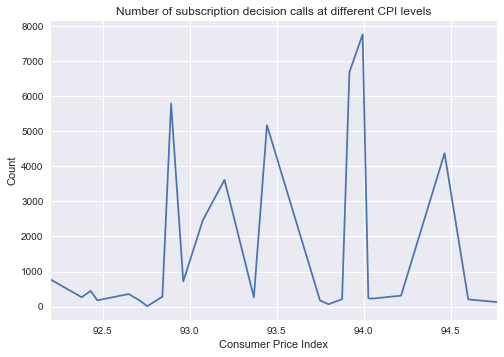

In [89]:
df.groupby('cons.price.idx')['y'].count().plot()
plt.title('Number of subscription decision calls at different CPI levels')
plt.ylabel('Count')
plt.xlabel('Consumer Price Index')
plt.show()

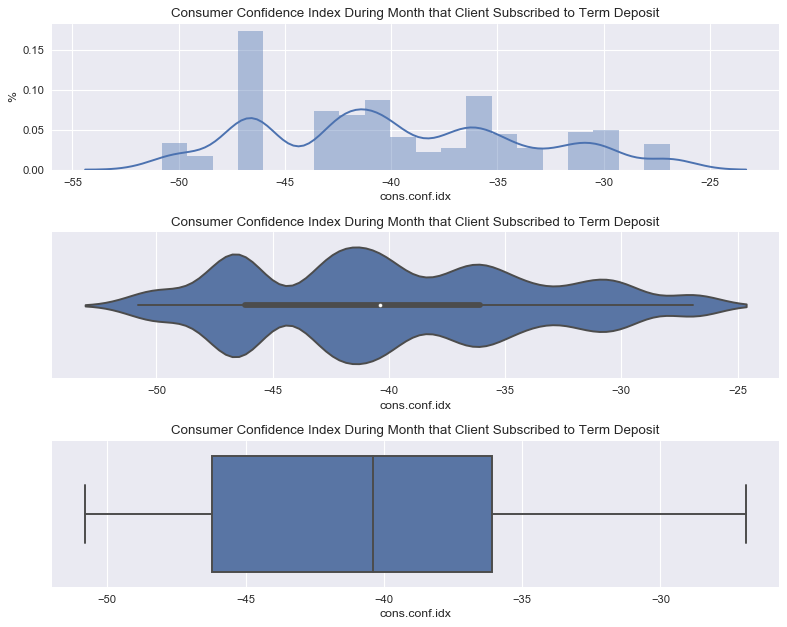

In [90]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

In [91]:
propNo = yes.groupby('cons.conf.idx')['y'].count().sort_values(ascending = False)

c = 0
top5 = 0
for i in propNo:
    top5 += i
    c += 1
    
    if c > 5:
        break 
    
total = sum(propNo)

print(top5 / total)

print(len(propNo))

0.468103448276
26


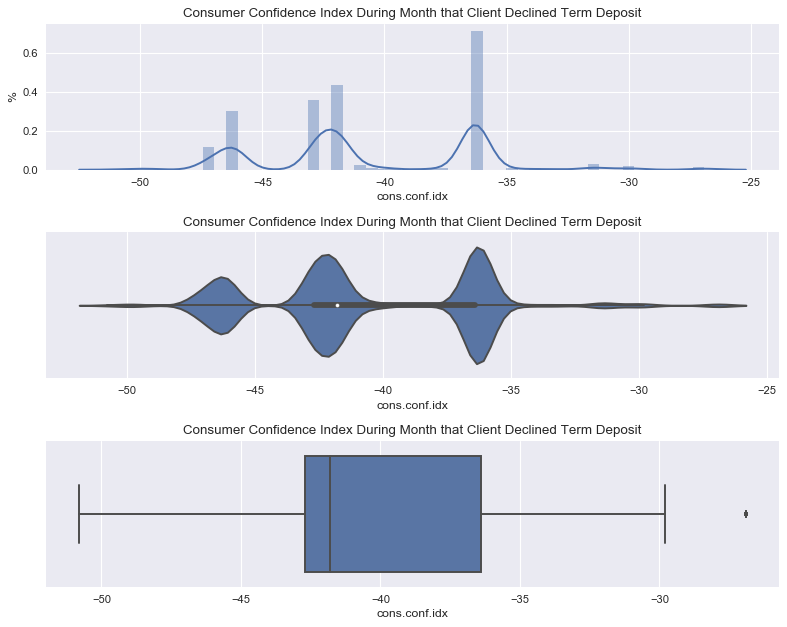

In [92]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Declined Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Declined Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no['cons.conf.idx'])
plt.title('Consumer Confidence Index During Month that Client Declined Term Deposit')

plt.tight_layout()
plt.show()

In [93]:
propNo = no.groupby('cons.conf.idx')['y'].count().sort_values(ascending = False)

c = 0
top5 = 0
for i in propNo:
    top5 += i
    c += 1
    
    if c > 5:
        break 
    
total = sum(propNo)

top5 / total

len(propNo)

26

In [94]:
print(len(pd.crosstab(df["cons.conf.idx"], df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df["cons.conf.idx"], df.y, normalize='index').sort_values('no'))


26
y                    no       yes
cons.conf.idx                    
-40.4          0.373134  0.626866
-40.0          0.424528  0.575472
-34.8          0.431818  0.568182
-40.3          0.434084  0.565916
-34.6          0.442529  0.557471
-38.3          0.484979  0.515021
-33.0          0.488372  0.511628
-37.5          0.504950  0.495050
-30.1          0.529412  0.470588
-39.8          0.532751  0.467249
-49.5          0.544118  0.455882
-50.8          0.546875  0.453125
-50.0          0.553191  0.446809
-26.9          0.597315  0.402685
-29.8          0.602996  0.397004
-33.6          0.629213  0.370787
-40.8          0.630769  0.369231
-31.4          0.657143  0.342857
-47.1          0.820179  0.179821
-45.9          0.900000  0.100000
-46.2          0.909562  0.090438
-42.7          0.939117  0.060883
-42.0          0.947456  0.052544
-36.1          0.947633  0.052367
-41.8          0.957019  0.042981
-36.4          0.969084  0.030916


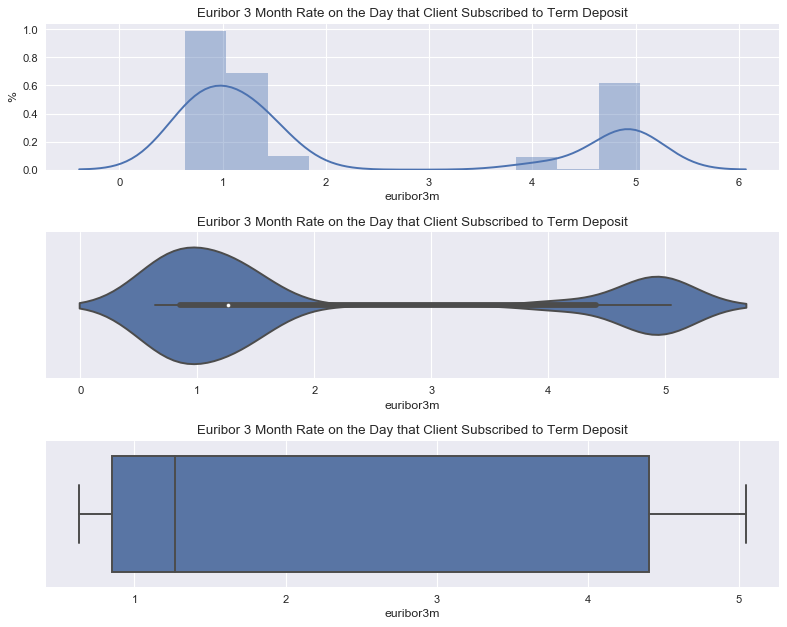

In [95]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

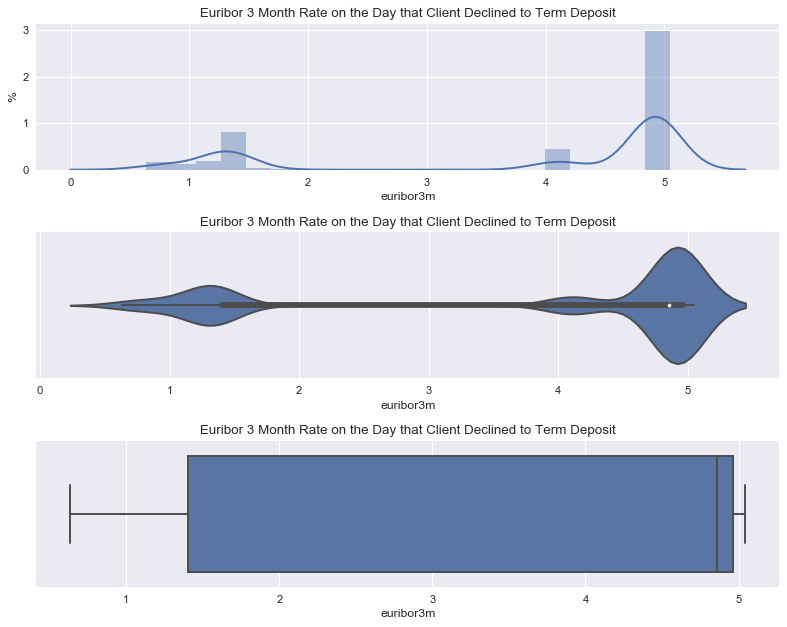

In [96]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Declined to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Declined to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no['euribor3m'])
plt.title('Euribor 3 Month Rate on the Day that Client Declined to Term Deposit')

plt.tight_layout()
plt.show()

In [97]:
print(len(pd.crosstab(df["euribor3m"], df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df["euribor3m"], df.y, normalize='index').sort_values('no'))

316
y                no       yes
euribor3m                    
0.933      0.000000  1.000000
0.688      0.000000  1.000000
3.053      0.000000  1.000000
0.870      0.076923  0.923077
0.885      0.100000  0.900000
0.755      0.142857  0.857143
4.936      0.166667  0.833333
0.637      0.166667  0.833333
1.548      0.166667  0.833333
0.697      0.173913  0.826087
1.726      0.181818  0.818182
4.794      0.200000  0.800000
0.683      0.214286  0.785714
0.652      0.228571  0.771429
0.634      0.250000  0.750000
0.762      0.250000  0.750000
4.223      0.250000  0.750000
0.900      0.259259  0.740741
0.733      0.277778  0.722222
1.025      0.285714  0.714286
0.638      0.285714  0.714286
1.035      0.285714  0.714286
0.985      0.285714  0.714286
1.799      0.285714  0.714286
0.802      0.285714  0.714286
0.704      0.285714  0.714286
0.655      0.294118  0.705882
0.905      0.294118  0.705882
0.695      0.300000  0.700000
0.899      0.300000  0.700000
...             ...       ...
4.970 

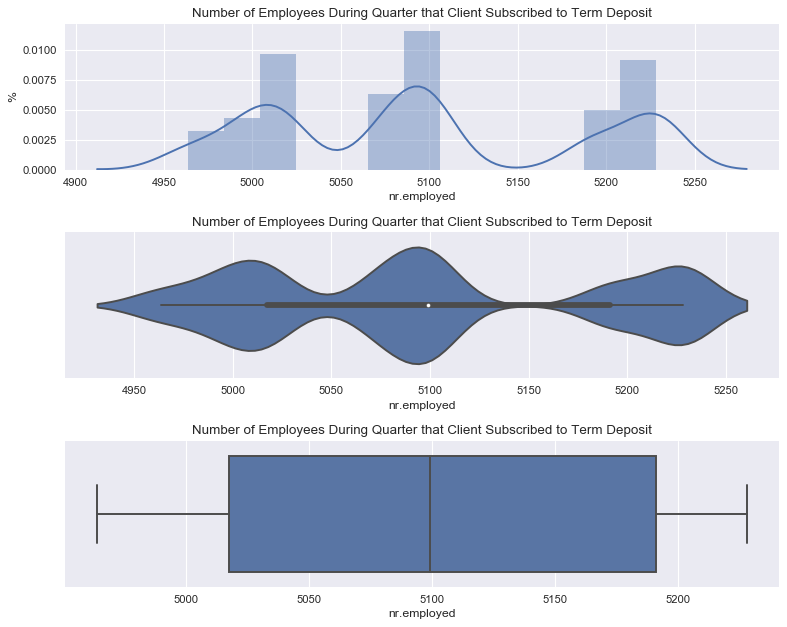

In [99]:
yes = df[df.y == 'yes']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(yes['nr.employed'])
plt.title('Number of Employees During Quarter that Client Subscribed to Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(yes['nr.employed'])
plt.title('Number of Employees During Quarter that Client Subscribed to Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(yes['nr.employed'])
plt.title('Number of Employees During Quarter that Client Subscribed to Term Deposit')

plt.tight_layout()
plt.show()

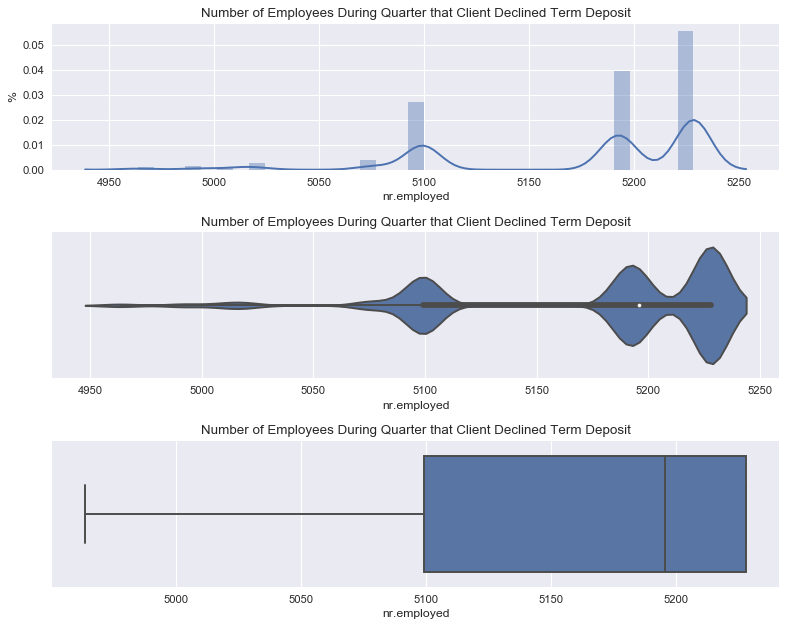

In [100]:
no = df[df.y == 'no']

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.distplot(no['nr.employed'])
plt.title('Number of Employees During Quarter that Client Declined Term Deposit')
plt.ylabel('%')

plt.subplot(3, 1, 2)
sns.violinplot(no['nr.employed'])
plt.title('Number of Employees During Quarter that Client Declined Term Deposit')

plt.subplot(3, 1, 3)
sns.boxplot(no['nr.employed'])
plt.title('Number of Employees During Quarter that Client Declined Term Deposit')

plt.tight_layout()
plt.show()

In [101]:
print(len(pd.crosstab(df["nr.employed"], df.y, normalize='index').sort_values('no')))
print(pd.crosstab(df["nr.employed"], df.y, normalize='index').sort_values('no'))


11
y                  no       yes
nr.employed                    
5008.7       0.432308  0.567692
4991.6       0.478655  0.521345
5023.5       0.488372  0.511628
4963.6       0.525984  0.474016
5017.5       0.576097  0.423903
5076.2       0.642814  0.357186
5099.1       0.872041  0.127959
5176.3       0.900000  0.100000
5195.8       0.937008  0.062992
5228.1       0.946655  0.053345
5191.0       0.969084  0.030916


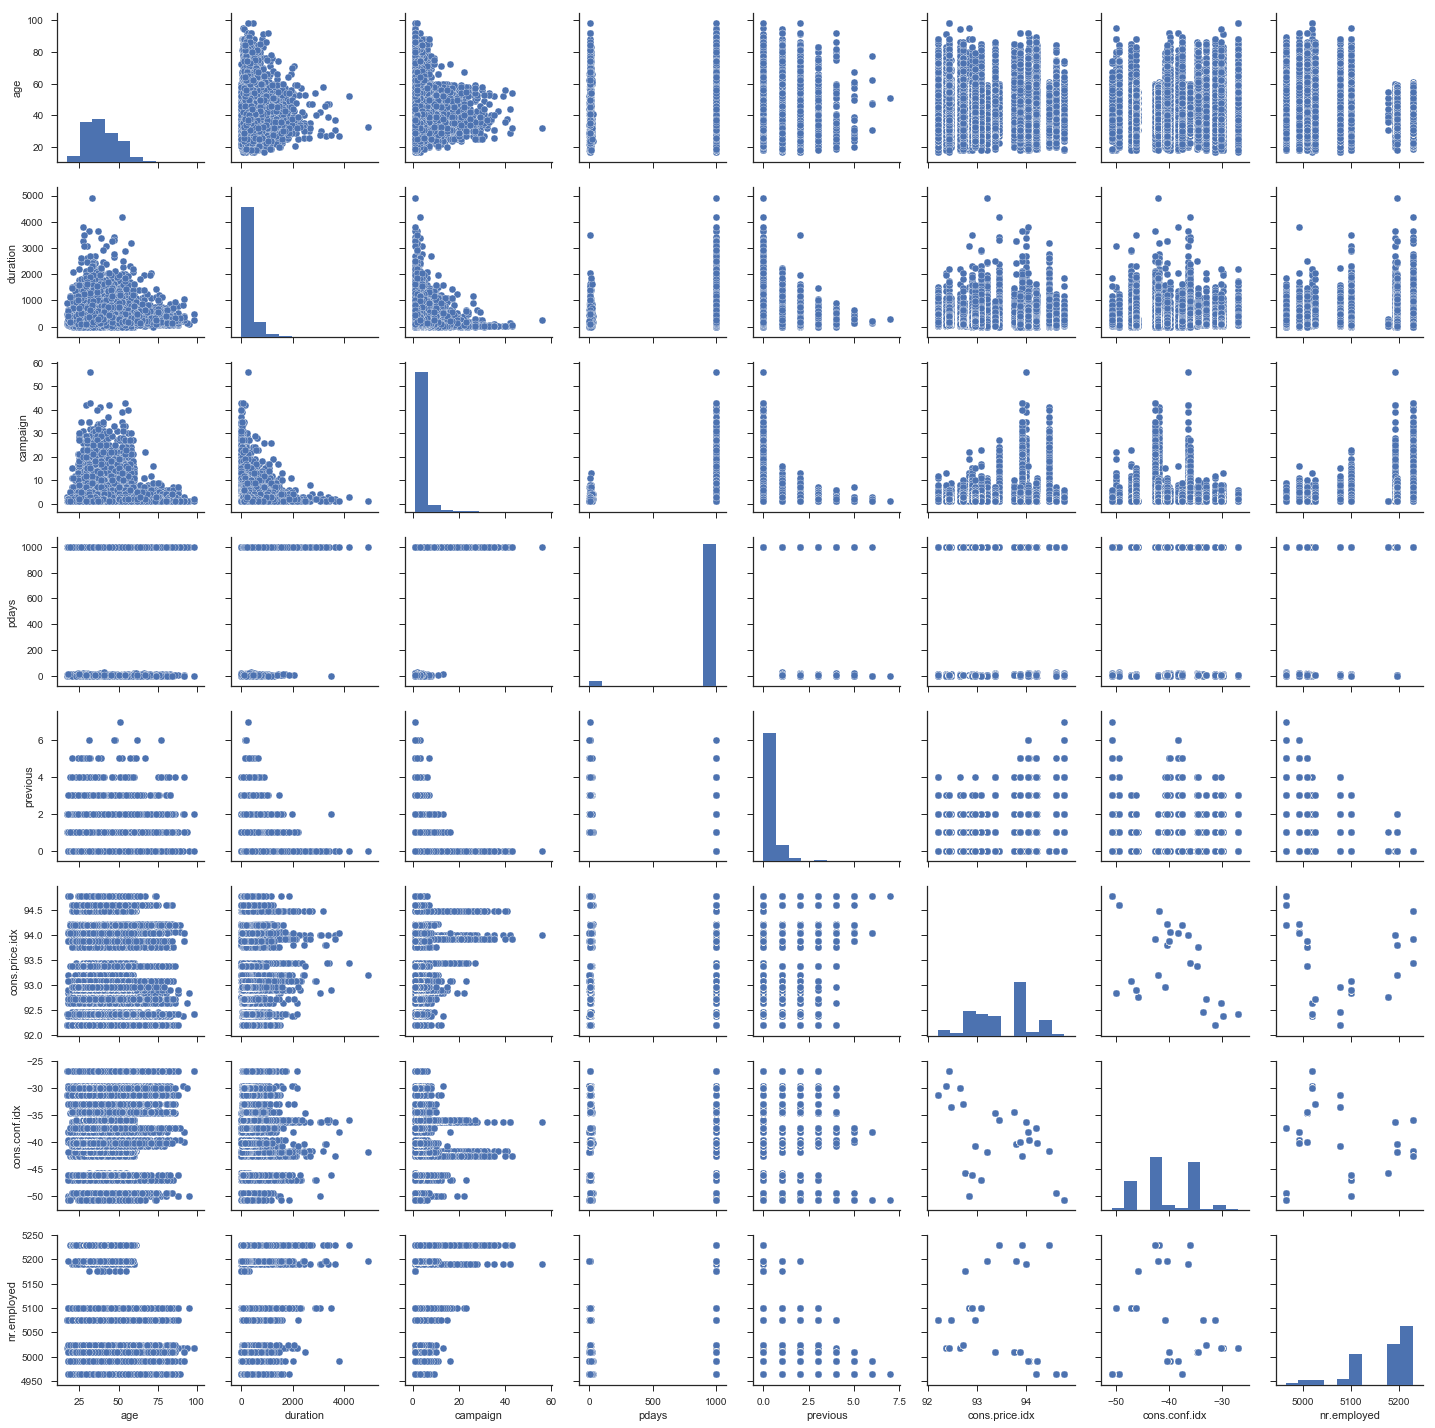

In [102]:
import seaborn as sns
plt.gcf().clear()

x = df.iloc[:, [0, 10, 11, 12, 13, 16, 17, 19]]


sns.set(style="ticks")

sns.pairplot(x)

plt.show()

In [103]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [104]:
y = df2.y
x = df2.drop(['y', 'job', 'marital', 'education', 'default', 'housing', 'loan',
      'contact', 'month', 'day_of_week','poutcome'], axis=1)

x = x.iloc[:,:63]

In [105]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
unknown_profession               41188 non-null int64
self-employed                    41188 non-null int64
admin.                           41188 non-null int64
services                         41188 non-null int64
housemaid                        41188 non-null int64
retired                          41188 non-null int64
unemployed       

In [106]:
lr = sm.Logit(y, x)

In [107]:
result = lr.fit()

         Current function value: 0.207316
         Iterations: 35


/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [108]:
result.summary()

AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

In [ ]:
coefficients = result.params
coefficients

In [ ]:
result.conf_int()

In [109]:
a = df2.groupby('age')['previous'].sum()
b = df2.groupby('age')['previous'].count()
c = a/b
c = c.reset_index().rename(columns={'previous': 'prop_previous_by_age'})
df2 = df2.merge(c, on='age')

a = df2.groupby('job')['previous'].sum()
b = df2.groupby('job')['previous'].count()
c = a/b
c = c.reset_index().rename(columns={'previous': 'prop_previous_by_job'})
df2 = df2.merge(c, on='job')

a = df2.groupby('marital')['previous'].sum()
b = df2.groupby('marital')['previous'].count()
c = a/b
c = c.reset_index().rename(columns={'previous': 'prop_previous_by_marital'})
df2 = df2.merge(c, on='marital')

a = df2.groupby('education')['previous'].sum()
b = df2.groupby('education')['previous'].count()
c = a/b
c = c.reset_index().rename(columns={'previous': 'prop_previous_by_education'})
df2 = df2.merge(c, on='education')

In [110]:
cols = ['age','job','marital','education','prop_previous_by_age', 'prop_previous_by_job',
        'prop_previous_by_marital', 'prop_previous_by_education']

In [111]:
jobs = list(set(df2.job.values))
marital = list(set(df2.marital.values))
edu = list(set(df2.education.values))

In [112]:
for item in jobs:
    if item == 'unknown':
        temp = item + '_profession'
        cols.append(temp)
    else:
        cols.append(item)
    

In [113]:
cols

['age',
 'job',
 'marital',
 'education',
 'prop_previous_by_age',
 'prop_previous_by_job',
 'prop_previous_by_marital',
 'prop_previous_by_education',
 'student',
 'management',
 'retired',
 'admin.',
 'services',
 'unknown_profession',
 'entrepreneur',
 'blue-collar',
 'self-employed',
 'housemaid',
 'unemployed',
 'technician']

In [114]:
for item in marital:
    if item == 'unknown':
        temp = item + '_marital_status'
        cols.append(temp)
    else:
        cols.append(item)

for item in edu:
    if item == 'unknown':
        temp = item + '_education'
        cols.append(temp)
    else:
        cols.append(item)

In [115]:
cols

['age',
 'job',
 'marital',
 'education',
 'prop_previous_by_age',
 'prop_previous_by_job',
 'prop_previous_by_marital',
 'prop_previous_by_education',
 'student',
 'management',
 'retired',
 'admin.',
 'services',
 'unknown_profession',
 'entrepreneur',
 'blue-collar',
 'self-employed',
 'housemaid',
 'unemployed',
 'technician',
 'married',
 'single',
 'divorced',
 'unknown_marital_status',
 'university.degree',
 'high.school',
 'unknown_education',
 'professional.course',
 'illiterate',
 'basic.4y',
 'basic.9y',
 'basic.6y']

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Columns: 118 entries, age to prop_previous_by_education
dtypes: float64(9), int64(99), object(10)
memory usage: 37.4+ MB


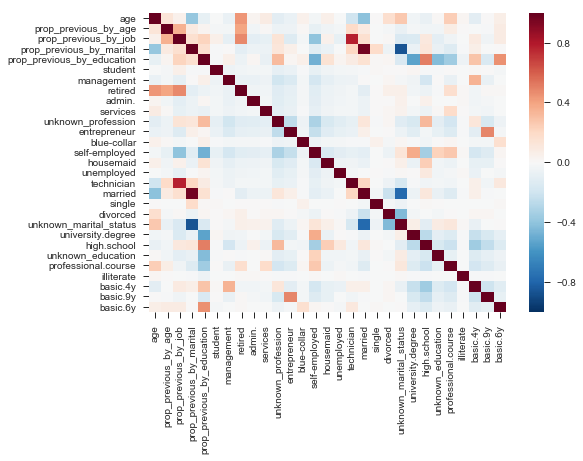

,age,prop_previous_by_age,prop_previous_by_job,prop_previous_by_marital,prop_previous_by_education,student,management,retired,admin.,services,...,divorced,unknown_marital_status,university.degree,high.school,unknown_education,professional.course,illiterate,basic.4y,basic.9y,basic.6y
age,1.000000,0.126152,0.052445,-0.386964,-0.084431,-0.004426,-0.065731,0.440772,0.031213,0.085403,...,0.166125,0.271266,-0.038320,-0.071138,0.009897,0.244079,0.017007,-0.106550,0.002054,0.069485
prop_previous_by_age,0.126152,1.000000,0.356036,0.087360,0.024442,-0.018048,-0.029739,0.396893,-0.033383,0.008149,...,-0.018513,-0.070607,-0.021898,-0.036481,-0.036036,0.071483,0.003916,-0.000241,-0.013765,0.078171
prop_previous_by_job,0.052445,0.356036,1.000000,0.163080,0.221014,0.062285,-0.087854,0.481308,-0.097862,-0.085516,...,0.008749,-0.153203,-0.146005,0.108317,-0.100343,-0.046575,-0.002015,0.089804,-0.042795,0.078569
prop_previous_by_marital,-0.386964,0.087360,0.163080,1.000000,0.160613,-0.008726,0.007223,-0.095235,-0.059477,-0.057316,...,-0.061000,-0.863965,-0.063985,0.119082,-0.076189,-0.129700,-0.010764,0.064298,-0.006710,0.001439
prop_previous_by_education,-0.084431,0.024442,0.221014,0.160613,1.000000,-0.014011,0.061571,-0.056983,0.017036,-0.075228,...,0.019851,-0.155159,-0.531313,0.511208,-0.432257,-0.353984,-0.052557,0.288533,-0.153473,0.455343
student,-0.004426,-0.018048,0.062285,-0.008726,-0.014011,1.000000,-0.051881,-0.033166,-0.030413,-0.025821,...,0.005196,0.006508,0.016461,-0.012899,-0.015328,0.004771,-0.003322,0.009201,0.006075,-0.018440
management,-0.065731,-0.029739,-0.087854,0.007223,0.061571,-0.051881,1.000000,-0.068171,-0.062513,-0.053075,...,0.022850,-0.018202,-0.045225,-0.180257,0.001843,-0.073709,-0.006828,0.344564,-0.070904,-0.006891
retired,0.440772,0.396893,0.481308,-0.095235,-0.056983,-0.033166,-0.068171,1.000000,-0.039962,-0.033929,...,0.059814,0.057858,-0.036849,-0.059359,-0.010967,0.169931,0.013056,-0.034942,0.008031,0.015554
admin.,0.031213,-0.033383,-0.097862,-0.059477,0.017036,-0.030413,-0.062513,-0.039962,1.000000,-0.031113,...,0.006657,0.051050,-0.001371,0.051832,-0.005748,-0.004627,0.008579,-0.031929,-0.019858,-0.002746
services,0.085403,0.008149,-0.085516,-0.057316,-0.075228,-0.025821,-0.053075,-0.033929,-0.031113,1.000000,...,0.020571,0.042492,-0.026678,-0.058528,0.012049,0.186187,0.003938,-0.025783,-0.034931,-0.001947


In [117]:
# check for correlation 
corr = df2[cols].corr()
sns.heatmap(corr)
plt.xticks(rotation='vertical')
plt.show()

corr

In [118]:
df2.drop(['prop_previous_by_age',
 'prop_previous_by_job',
 'prop_previous_by_marital',
 'prop_previous_by_education'], axis=1, inplace=True)

In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Columns: 114 entries, age to previous_3
dtypes: float64(5), int64(99), object(10)
memory usage: 36.1+ MB


In [120]:
campaign = df2.campaign
pdays = df2.pdays
previous = df2.previous

In [121]:
df_plot = df2[df2.pdays < 999]

In [122]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 23 to 41172
Columns: 114 entries, age to previous_3
dtypes: float64(5), int64(99), object(10)
memory usage: 1.3+ MB


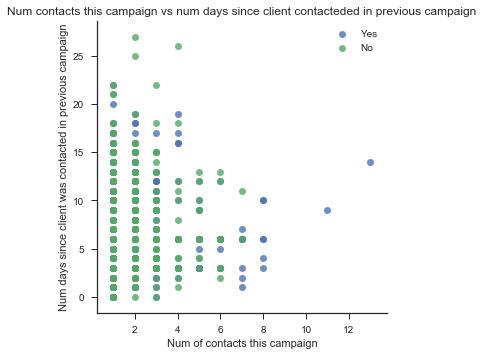

In [123]:
import seaborn as sns
 
sns.lmplot( x="campaign", y="pdays", data=df_plot, fit_reg=False, hue='y', legend=False)
plt.title('Num contacts this campaign vs num days since client contacteded in previous campaign')
plt.xlabel('Num of contacts this campaign')
plt.ylabel('Num days since client was contacted in previous campaign')
plt.legend(['Yes', 'No'], loc='upper right')
 
plt.show()


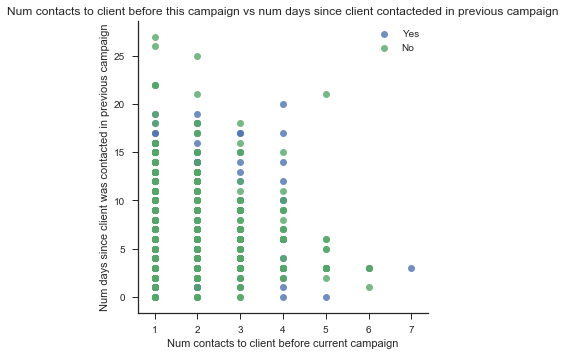

In [124]:
import seaborn as sns
 
sns.lmplot( x="previous", y="pdays", data=df_plot, fit_reg=False, hue='y', legend=False)
plt.title('Num contacts to client before this campaign vs num days since client contacteded in previous campaign')
plt.xlabel('Num contacts to client before current campaign')
plt.ylabel('Num days since client was contacted in previous campaign')

plt.legend(['Yes', 'No'], loc='upper right')
 
plt.show()


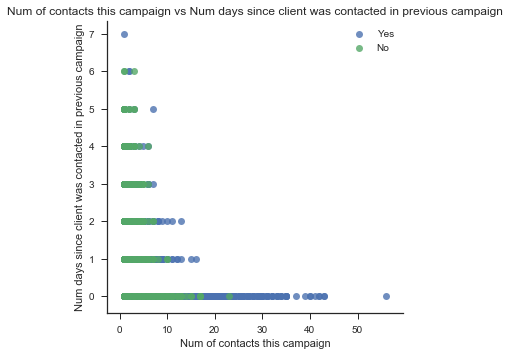

In [125]:
import seaborn as sns
 
sns.lmplot( x="campaign", y="previous", data=df2, fit_reg=False, hue='y', legend=False)
plt.title('Num of contacts this campaign vs Num days since client was contacted in previous campaign')
plt.xlabel('Num of contacts this campaign')
plt.ylabel('Num days since client was contacted in previous campaign')
plt.legend(['Yes', 'No'], loc='upper right')
 
plt.show()


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Columns: 114 entries, age to previous_3
dtypes: float64(5), int64(99), object(10)
memory usage: 37.4+ MB


In [127]:
df2.to_csv('Hold/df2.csv', index=False)

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Columns: 114 entries, age to previous_3
dtypes: float64(5), int64(99), object(10)
memory usage: 37.4+ MB


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import datetime

In [37]:
y = df2.y
x = df2.drop(['y', 'duration', 'emp.var.rate', 'euribor3m', 'previous_campaign_nonexistent', 'default', 'housing', 'loan',
     'contact', 'month', 'day_of_week','poutcome', 'education', 'marital', 'job'], axis=1)

In [38]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x, y)

importance = list(rfc.feature_importances_)
feature = list(x.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                        Feature  Importance
0                           age    0.079922
99         prop_previous_by_age    0.073282
6                   nr.employed    0.050754
1                      campaign    0.048763
5                 cons.conf.idx    0.035607
4                cons.price.idx    0.032784
100        prop_previous_by_job    0.023768
2                         pdays    0.023317
89                   campaign_3    0.022678
36                   no_housing    0.021736
34              unknown_housing    0.020960
102  prop_previous_by_education    0.020301
95                      pdays_5    0.020274
54                          mon    0.018192
55                          fri    0.016813
56                          thu    0.015865
53                          wed    0.015810
52                          tue    0.015481
88                   campaign_2    0.014600
37                 unknown_loan    0.014457
57    previous_campaign_fai